# **Train YOLO-OBB**

# YOLO用データセット準備スクリプト

## 機能概要
このスクリプトは物体検出用のYOLOv11モデルで使用するデータセットを準備します。

## 主な処理
1. **ディレクトリ構造の初期化**
   - 既存のデータセットディレクトリを削除し、新規作成
   - 訓練用と検証用のサブディレクトリを作成（画像用とラベル用）

2. **データの分割**
   - 画像ファイルをランダムに並べ替え
   - 8:2の比率で訓練データと検証データに分割

3. **ファイルのコピー**
   - 画像ファイルを対応するディレクトリにコピー
   - 対応するラベルファイルを検索してコピー
   - ラベルファイルが見つからない場合は警告を表示

4. **YAML設定ファイルの作成**
   - データセットのパス情報
   - クラス数（1：pupil）
   - クラス名の定義

## 出力情報
- 訓練データファイル数
- 検証データファイル数
- 作成されたYAMLファイルのパス

In [4]:
import os
import shutil
import random
import yaml

# パスの設定
orig_dir = r'C:\Users\CorneAI\YOLOv11_OBB\eyelid_image\1-295_periocular'
images_dir = os.path.join(orig_dir, 'images')
labels_dir = os.path.join(orig_dir, 'labels')
dst_dir = r"C:\Users\CorneAI\YOLOv11_OBB\dataset"

# datasetフォルダが存在する場合は削除して新規作成
if os.path.exists(dst_dir):
    shutil.rmtree(dst_dir)
os.makedirs(dst_dir)

# train, validフォルダの作成
train_img_dir = os.path.join(dst_dir, 'train', 'images')
train_label_dir = os.path.join(dst_dir, 'train', 'labels')
valid_img_dir = os.path.join(dst_dir, 'valid', 'images')
valid_label_dir = os.path.join(dst_dir, 'valid', 'labels')

os.makedirs(train_img_dir)
os.makedirs(train_label_dir)
os.makedirs(valid_img_dir)
os.makedirs(valid_label_dir)

# 画像ファイル名のリストを取得
image_files = [f for f in os.listdir(images_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]
random.shuffle(image_files)  # ランダムに並び替え

# 実際にコピーされたファイルをカウント
train_count = 0
valid_count = 0

# 8:2の比率で分割するインデックスを計算
split_idx = int(len(image_files) * 0.8)
train_files = image_files[:split_idx]
valid_files = image_files[split_idx:]

# ファイルをtrainとvalidに分配
for file in train_files:
    # 画像ファイルのコピー
    src_img = os.path.join(images_dir, file)
    dst_img = os.path.join(train_img_dir, file)
    
    # 対応するラベルファイルの処理
    # 拡張子を除いたファイル名を取得
    base_name = os.path.splitext(file)[0]
    label_file = base_name + '.txt'
    src_label = os.path.join(labels_dir, label_file)
    
    # ラベルファイルが存在する場合のみコピー
    if os.path.exists(src_label):
        shutil.copy2(src_img, dst_img)
        dst_label = os.path.join(train_label_dir, label_file)
        shutil.copy2(src_label, dst_label)
        train_count += 1
    else:
        print(f"警告: ラベルファイルが見つかりません: {label_file}")

for file in valid_files:
    # 画像ファイルのコピー
    src_img = os.path.join(images_dir, file)
    dst_img = os.path.join(valid_img_dir, file)
    
    # 対応するラベルファイルの処理
    base_name = os.path.splitext(file)[0]
    label_file = base_name + '.txt'
    src_label = os.path.join(labels_dir, label_file)
    
    # ラベルファイルが存在する場合のみコピー
    if os.path.exists(src_label):
        shutil.copy2(src_img, dst_img)
        dst_label = os.path.join(valid_label_dir, label_file)
        shutil.copy2(src_label, dst_label)
        valid_count += 1
    else:
        print(f"警告: ラベルファイルが見つかりません: {label_file}")

# yamlファイルの作成
yaml_path = os.path.join(dst_dir, 'data.yaml')
yaml_content = {
    'train': os.path.join(dst_dir, 'train', 'images'),
    'val': os.path.join(dst_dir, 'valid', 'images'),
    'nc': 2,  # クラス数
    'names':  {0: "Pupil", 1: "Iris",}  # クラス名
}

with open(yaml_path, 'w') as f:
    yaml.dump(yaml_content, f, default_flow_style=False)

print("データセットの準備が完了しました。")
print(f"訓練データ: {train_count}ファイル")
print(f"検証データ: {valid_count}ファイル")
print(f"YAMLファイル作成: {yaml_path}")

警告: ラベルファイルが見つかりません: 293-20201021-6-110422_ac091b8d764afb1c57d271aa9d0369e3ccc57dae1470aaecef5820a88395ed70_R.txt
警告: ラベルファイルが見つかりません: 236-20050405-11-143325_e9ff095e20703175d24eed7af256291eee796adf93f804ae8b467bb0b74bf482_L.txt
警告: ラベルファイルが見つかりません: 148-20060117-62-141025_b9fe59028b73d593f7946e503844addc6f7df506546f9103afcf7b4eb8a449eb_L.txt
警告: ラベルファイルが見つかりません: 256-20120822-55-130105_c3293327a84f8c214a18c2983e5fb3d0f8da47201a603ff3ba9719f4029f8271_R.txt
警告: ラベルファイルが見つかりません: 43-20171220-6-130648_99f5b0bb11fce93289122f3abd08f33a72c2be163ea6217c5751ef91dbea399f_L.txt
警告: ラベルファイルが見つかりません: 229-20190821-59-141851_dad27a3f5a9e3fa3fff6dc872825f1336ec583ee6addc1b84117c8eb4324ea82_R.txt
警告: ラベルファイルが見つかりません: 165-20170605-72-143316_e8168f472eff9c3c6a04d0a1386ecef1123291f148b13ec7ababd01934cfcf0a_L.txt
警告: ラベルファイルが見つかりません: 164-20130529-56-095440_9120da5ff183cf8e3c9c801ad163f11806af291e96768ca61d7ae1ed6bf35244_R.txt
警告: ラベルファイルが見つかりません: 19-20190424-62-102547_5ec6b61028168b693db72d169e20a112036ad613

# **Training**

In [5]:
import torch

# CUDAが使えるかどうかを確認
cuda_available = torch.cuda.is_available()

if cuda_available:
    print(f"CUDA is available! GPU: {torch.cuda.get_device_name(0)}")
else:
    print("CUDA is not available.")

CUDA is available! GPU: NVIDIA GeForce RTX 3080 Ti Laptop GPU


In [6]:
from ultralytics import YOLO
import wget

# モデルのロード
import os

model_path = 'yolo11n-obb.pt'
if not os.path.exists(model_path):
    # モデルが存在しない場合のみダウンロード
    print(f"{model_path}が見つからないため、ダウンロードします...")
    wget.download('https://github.com/ultralytics/assets/releases/download/v8.3.0/yolo11n-obb.pt')
else:
    print(f"{model_path}が既に存在します。既存のモデルを使用します。")

model = YOLO(model_path)

yolo11n-obb.ptが既に存在します。既存のモデルを使用します。


In [7]:
results = model.train(data=r"C:\Users\CorneAI\YOLOv11_OBB\dataset\data.yaml", epochs=1000, imgsz=640, pretrained=True, degrees=0)


New https://pypi.org/project/ultralytics/8.3.116 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.99  Python-3.10.5 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 3080 Ti Laptop GPU, 16384MiB)
engine\trainer: task=obb, mode=train, model=yolo11n-obb.pt, data=C:\Users\CorneAI\YOLOv11_OBB\dataset\data.yaml, epochs=1000, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retin

train: Scanning C:\Users\CorneAI\YOLOv11_OBB\dataset\train\labels... 381 images, 0 backgrounds, 0 corrupt: 100%|██████████| 381/381 [00:00<00:00, 687.84it/s]

train: WARNING  C:\Users\CorneAI\YOLOv11_OBB\dataset\train\images\136-20170420-12-155643_f1f9fba5b88d5f7d1e2371af0db4b6874cebe22bbc5024bd04e11155d508d287_L.jpg: 1 duplicate labels removed
train: WARNING  C:\Users\CorneAI\YOLOv11_OBB\dataset\train\images\136-20170420-12-155643_f415d49700bed236c429e0e797431b8b028b319acac36910f624f8491321eb42_L.jpg: 1 duplicate labels removed
train: New cache created: C:\Users\CorneAI\YOLOv11_OBB\dataset\train\labels.cache



val: Scanning C:\Users\CorneAI\YOLOv11_OBB\dataset\valid\labels... 113 images, 0 backgrounds, 0 corrupt: 100%|██████████| 113/113 [00:00<00:00, 515.17it/s]

val: New cache created: C:\Users\CorneAI\YOLOv11_OBB\dataset\valid\labels.cache


Plotting labels to runs\obb\train3\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 87 weight(decay=0.0), 97 weight(decay=0.0005), 96 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\obb\train3
Starting training for 1000 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     1/1000       2.5G      1.553       3.14       2.11         44        640: 100%|██████████| 24/24 [00:05<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.60it/s]

                   all        113        226      0.677      0.774      0.781      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     2/1000      5.09G      1.088      1.445      1.639         42        640: 100%|██████████| 24/24 [00:02<00:00,  8.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.14it/s]

                   all        113        226      0.981       0.98      0.985      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     3/1000       5.1G     0.9759     0.9926      1.482         37        640: 100%|██████████| 24/24 [00:02<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.93it/s]

                   all        113        226      0.995      0.982       0.99      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     4/1000      5.12G     0.9426     0.8084      1.474         55        640: 100%|██████████| 24/24 [00:02<00:00,  8.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.99it/s]

                   all        113        226       0.99      0.987      0.993      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     5/1000      5.13G     0.8607     0.6935      1.431         37        640: 100%|██████████| 24/24 [00:02<00:00,  8.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.70it/s]

                   all        113        226      0.989      0.987      0.987      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     6/1000      5.14G     0.8726     0.6505      1.426         53        640: 100%|██████████| 24/24 [00:02<00:00,  8.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.10it/s]

                   all        113        226      0.993      0.987       0.99      0.874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     7/1000      5.16G     0.8586      0.606      1.439         39        640: 100%|██████████| 24/24 [00:02<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.86it/s]

                   all        113        226      0.996      0.995      0.995      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     8/1000      5.18G     0.8211     0.5834      1.424         47        640: 100%|██████████| 24/24 [00:02<00:00,  8.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.81it/s]

                   all        113        226      0.989      0.986      0.994      0.893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     9/1000      5.19G     0.8565      0.606      1.458         42        640: 100%|██████████| 24/24 [00:02<00:00,  8.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.93it/s]

                   all        113        226      0.995          1      0.995      0.886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    10/1000      5.21G     0.8238     0.5683      1.434         50        640: 100%|██████████| 24/24 [00:02<00:00,  8.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.17it/s]

                   all        113        226      0.995      0.991      0.995      0.896



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    11/1000      5.22G     0.8181     0.5366      1.378         40        640: 100%|██████████| 24/24 [00:02<00:00,  8.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.83it/s]

                   all        113        226      0.998       0.99       0.99      0.897



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    12/1000      5.24G     0.8408     0.5459       1.43         41        640: 100%|██████████| 24/24 [00:02<00:00,  8.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.78it/s]

                   all        113        226      0.985      0.991       0.99      0.902



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    13/1000      5.25G     0.8098     0.5268        1.4         42        640: 100%|██████████| 24/24 [00:02<00:00,  8.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.53it/s]

                   all        113        226      0.988      0.991      0.991      0.915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    14/1000      5.27G     0.8153      0.546      1.422         51        640: 100%|██████████| 24/24 [00:02<00:00,  8.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.66it/s]

                   all        113        226      0.986      0.991      0.994      0.886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    15/1000      5.28G     0.7958     0.5336      1.436         31        640: 100%|██████████| 24/24 [00:02<00:00,  8.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.52it/s]

                   all        113        226      0.994      0.991      0.992      0.907



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    16/1000       5.3G     0.8067     0.5478      1.429         50        640: 100%|██████████| 24/24 [00:02<00:00,  8.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.03it/s]

                   all        113        226      0.999      0.991      0.994      0.923



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    17/1000      5.31G     0.7373     0.5069      1.355         39        640: 100%|██████████| 24/24 [00:03<00:00,  7.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.62it/s]

                   all        113        226      0.996      0.985      0.991      0.911



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    18/1000      5.33G     0.7441     0.4873      1.335         33        640: 100%|██████████| 24/24 [00:03<00:00,  7.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.29it/s]

                   all        113        226      0.995      0.996      0.995      0.922



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    19/1000      5.34G     0.7354     0.4893       1.37         58        640: 100%|██████████| 24/24 [00:02<00:00,  8.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.77it/s]

                   all        113        226      0.996       0.99      0.995      0.925



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    20/1000      5.36G     0.7186     0.4739      1.339         49        640: 100%|██████████| 24/24 [00:02<00:00,  8.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.64it/s]

                   all        113        226      0.991      0.985      0.995      0.897



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    21/1000      5.37G     0.7749     0.5157      1.415         36        640: 100%|██████████| 24/24 [00:02<00:00,  8.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.89it/s]

                   all        113        226      0.989      0.995      0.995      0.894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    22/1000      5.39G     0.7906     0.5025      1.413         51        640: 100%|██████████| 24/24 [00:03<00:00,  7.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.56it/s]

                   all        113        226      0.998      0.995      0.995      0.921



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    23/1000       5.4G     0.7773     0.5028      1.393         51        640: 100%|██████████| 24/24 [00:02<00:00,  8.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.67it/s]

                   all        113        226      0.998       0.99      0.995      0.919



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    24/1000      5.42G     0.7449     0.4773      1.408         41        640: 100%|██████████| 24/24 [00:02<00:00,  8.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.95it/s]

                   all        113        226      0.994      0.996      0.995      0.935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    25/1000      5.44G     0.7249     0.4662      1.354         47        640: 100%|██████████| 24/24 [00:03<00:00,  7.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.83it/s]

                   all        113        226      0.994      0.996      0.995      0.932



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    26/1000      5.45G     0.7275     0.4707      1.391         42        640: 100%|██████████| 24/24 [00:02<00:00,  8.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.66it/s]

                   all        113        226      0.999      0.991      0.995      0.928



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    27/1000      5.46G     0.7547     0.4809        1.4         48        640: 100%|██████████| 24/24 [00:02<00:00,  8.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.55it/s]

                   all        113        226      0.994      0.994      0.995      0.917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    28/1000      5.48G     0.7318     0.4834      1.387         46        640: 100%|██████████| 24/24 [00:02<00:00,  8.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.15it/s]

                   all        113        226      0.999      0.995      0.995      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    29/1000       5.5G     0.7249     0.4707      1.359         50        640: 100%|██████████| 24/24 [00:02<00:00,  8.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.61it/s]

                   all        113        226      0.995      0.991      0.993      0.927



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    30/1000      5.51G     0.7095     0.4639      1.376         51        640: 100%|██████████| 24/24 [00:02<00:00,  8.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.73it/s]

                   all        113        226      0.997      0.996      0.995      0.944



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    31/1000      5.53G     0.7312     0.4768      1.384         40        640: 100%|██████████| 24/24 [00:02<00:00,  8.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.16it/s]

                   all        113        226      0.999      0.991      0.995      0.932



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    32/1000      5.54G     0.7037     0.4684      1.361         52        640: 100%|██████████| 24/24 [00:02<00:00,  8.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.08it/s]

                   all        113        226      0.996      0.987      0.995      0.926



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    33/1000      5.56G     0.7132     0.4659      1.354         55        640: 100%|██████████| 24/24 [00:02<00:00,  8.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.55it/s]

                   all        113        226      0.994      0.991      0.995      0.937



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    34/1000      5.57G     0.6868      0.458      1.364         47        640: 100%|██████████| 24/24 [00:03<00:00,  7.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.01it/s]

                   all        113        226      0.994      0.982      0.995      0.938



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    35/1000      5.59G     0.6753     0.4432      1.352         47        640: 100%|██████████| 24/24 [00:02<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.42it/s]

                   all        113        226      0.986      0.987       0.99       0.93



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    36/1000       5.6G     0.7453     0.4831      1.425         32        640: 100%|██████████| 24/24 [00:02<00:00,  8.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.30it/s]

                   all        113        226      0.998      0.991      0.995      0.936



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    37/1000      5.62G     0.6969     0.4509      1.374         41        640: 100%|██████████| 24/24 [00:02<00:00,  8.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.64it/s]

                   all        113        226      0.998      0.995      0.995       0.94



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    38/1000      5.63G     0.7122     0.4639      1.384         58        640: 100%|██████████| 24/24 [00:02<00:00,  8.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.92it/s]

                   all        113        226      0.997      0.995      0.995      0.943



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    39/1000      5.65G     0.6607     0.4302       1.32         59        640: 100%|██████████| 24/24 [00:02<00:00,  8.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.80it/s]

                   all        113        226      0.994      0.991      0.995       0.94



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    40/1000      5.66G     0.6776     0.4475      1.355         40        640: 100%|██████████| 24/24 [00:02<00:00,  8.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.18it/s]

                   all        113        226       0.99      0.987      0.991      0.935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    41/1000      5.68G     0.6989     0.4518      1.373         45        640: 100%|██████████| 24/24 [00:02<00:00,  8.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.45it/s]

                   all        113        226      0.994      0.995      0.995      0.931



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    42/1000      5.69G     0.6558     0.4213      1.315         43        640: 100%|██████████| 24/24 [00:02<00:00,  8.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.84it/s]

                   all        113        226      0.995      0.988      0.995      0.941



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    43/1000      5.71G     0.6826     0.4407      1.326         50        640: 100%|██████████| 24/24 [00:03<00:00,  7.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.53it/s]

                   all        113        226      0.992      0.994      0.995      0.944



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    44/1000      5.72G     0.6818     0.4406      1.368         53        640: 100%|██████████| 24/24 [00:02<00:00,  8.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.52it/s]

                   all        113        226      0.994      0.995      0.995      0.938



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    45/1000      5.74G     0.6584     0.4305      1.326         55        640: 100%|██████████| 24/24 [00:03<00:00,  7.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.87it/s]

                   all        113        226      0.995      0.991      0.995       0.94



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    46/1000      5.75G     0.6657     0.4466      1.386         35        640: 100%|██████████| 24/24 [00:02<00:00,  8.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.50it/s]

                   all        113        226      0.997      0.995      0.995      0.947



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    47/1000      5.77G       0.68     0.4514       1.37         53        640: 100%|██████████| 24/24 [00:02<00:00,  8.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.34it/s]

                   all        113        226      0.994      0.996      0.995      0.942



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    48/1000      5.79G       0.66     0.4236      1.354         58        640: 100%|██████████| 24/24 [00:03<00:00,  7.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.37it/s]

                   all        113        226      0.994      0.995      0.995      0.939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    49/1000       5.8G     0.6672     0.4341      1.344         32        640: 100%|██████████| 24/24 [00:02<00:00,  8.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.68it/s]

                   all        113        226      0.993      0.995      0.995      0.943



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    50/1000      5.82G     0.6339     0.4326      1.347         52        640: 100%|██████████| 24/24 [00:03<00:00,  7.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.36it/s]

                   all        113        226      0.993      0.995      0.995      0.936



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    51/1000      5.83G     0.6632     0.4471      1.332         42        640: 100%|██████████| 24/24 [00:03<00:00,  7.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.23it/s]

                   all        113        226       0.99      0.991      0.992      0.951



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    52/1000      5.85G     0.6713     0.4296      1.345         48        640: 100%|██████████| 24/24 [00:03<00:00,  7.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.81it/s]

                   all        113        226      0.995      0.995      0.995      0.949



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    53/1000      5.86G     0.6797     0.4331      1.357         41        640: 100%|██████████| 24/24 [00:03<00:00,  7.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.75it/s]

                   all        113        226      0.995      0.995      0.995      0.934



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    54/1000      5.88G     0.6788     0.4546      1.402         38        640: 100%|██████████| 24/24 [00:03<00:00,  7.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.30it/s]

                   all        113        226      0.993      0.996      0.995      0.947



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    55/1000      5.89G     0.6474      0.426      1.315         41        640: 100%|██████████| 24/24 [00:02<00:00,  8.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.26it/s]

                   all        113        226      0.992      0.996      0.995       0.95



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    56/1000      5.91G     0.6728     0.4489      1.367         55        640: 100%|██████████| 24/24 [00:03<00:00,  7.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.21it/s]

                   all        113        226      0.993      0.996      0.995      0.949



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    57/1000      5.92G     0.6792     0.4247      1.369         59        640: 100%|██████████| 24/24 [00:02<00:00,  8.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.54it/s]

                   all        113        226      0.994      0.996      0.995      0.944



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    58/1000      5.94G      0.667     0.4339      1.367         54        640: 100%|██████████| 24/24 [00:03<00:00,  7.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.28it/s]

                   all        113        226      0.994      0.995      0.995      0.943



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    59/1000      5.95G     0.6451      0.423       1.31         42        640: 100%|██████████| 24/24 [00:03<00:00,  7.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.28it/s]

                   all        113        226      0.993      0.995      0.995      0.931



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    60/1000      5.97G      0.628     0.4249      1.331         40        640: 100%|██████████| 24/24 [00:03<00:00,  7.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.57it/s]

                   all        113        226      0.997      0.987      0.991       0.94



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    61/1000      5.98G     0.6356     0.4046      1.318         41        640: 100%|██████████| 24/24 [00:02<00:00,  8.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.97it/s]

                   all        113        226      0.989      0.991       0.99      0.945



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    62/1000         6G     0.6264     0.4081      1.291         41        640: 100%|██████████| 24/24 [00:03<00:00,  7.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.81it/s]

                   all        113        226      0.993      0.995      0.995      0.946



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    63/1000      6.02G     0.6588     0.4322      1.366         61        640: 100%|██████████| 24/24 [00:03<00:00,  7.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.15it/s]

                   all        113        226      0.994      0.995      0.995      0.953



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    64/1000      6.03G     0.6358     0.4198      1.341         54        640: 100%|██████████| 24/24 [00:03<00:00,  7.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.68it/s]

                   all        113        226      0.994      0.996      0.995      0.953



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    65/1000      6.04G      0.623     0.4053       1.31         55        640: 100%|██████████| 24/24 [00:02<00:00,  8.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.12it/s]

                   all        113        226      0.994      0.995      0.995      0.946



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    66/1000      6.06G     0.6706     0.4155       1.36         47        640: 100%|██████████| 24/24 [00:03<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.71it/s]

                   all        113        226       0.99      0.995      0.995      0.939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    67/1000      6.08G     0.6417     0.4211      1.326         44        640: 100%|██████████| 24/24 [00:03<00:00,  7.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.24it/s]

                   all        113        226      0.998      0.987      0.995      0.935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    68/1000      6.09G     0.6194     0.4133      1.322         49        640: 100%|██████████| 24/24 [00:03<00:00,  7.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.27it/s]

                   all        113        226      0.998      0.991      0.995       0.95



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    69/1000      6.11G     0.6308      0.414      1.339         38        640: 100%|██████████| 24/24 [00:03<00:00,  7.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.40it/s]

                   all        113        226      0.994      0.996      0.995      0.944



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    70/1000      6.12G     0.6603     0.4133      1.331         42        640: 100%|██████████| 24/24 [00:03<00:00,  7.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.97it/s]

                   all        113        226      0.993      0.987      0.992       0.94



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    71/1000      6.14G     0.6334     0.4173      1.345         56        640: 100%|██████████| 24/24 [00:03<00:00,  7.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.02it/s]

                   all        113        226      0.994      0.996      0.995      0.944



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    72/1000      6.15G     0.6351     0.4181      1.343         57        640: 100%|██████████| 24/24 [00:03<00:00,  7.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.83it/s]

                   all        113        226      0.998          1      0.995      0.948



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    73/1000      6.17G     0.6346     0.3917      1.327         37        640: 100%|██████████| 24/24 [00:03<00:00,  7.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.89it/s]

                   all        113        226      0.993      0.996      0.995      0.945



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    74/1000      6.18G     0.6422     0.4202      1.343         42        640: 100%|██████████| 24/24 [00:03<00:00,  7.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.15it/s]

                   all        113        226      0.994      0.995      0.995      0.942



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    75/1000       6.2G     0.6285     0.4068      1.334         32        640: 100%|██████████| 24/24 [00:03<00:00,  7.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.58it/s]

                   all        113        226      0.999      0.987      0.995      0.951



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    76/1000      6.21G     0.6283      0.407       1.35         49        640: 100%|██████████| 24/24 [00:03<00:00,  7.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.41it/s]

                   all        113        226      0.994      0.996      0.995      0.952



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    77/1000      6.23G     0.6352     0.4107      1.325         52        640: 100%|██████████| 24/24 [00:03<00:00,  7.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.30it/s]

                   all        113        226      0.994      0.996      0.995      0.949



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    78/1000      6.24G     0.6234     0.4217       1.35         39        640: 100%|██████████| 24/24 [00:03<00:00,  7.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.50it/s]

                   all        113        226      0.993      0.996      0.995      0.949



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    79/1000      6.26G     0.6204     0.4112      1.336         52        640: 100%|██████████| 24/24 [00:03<00:00,  7.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.28it/s]

                   all        113        226      0.994      0.995      0.995      0.952



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    80/1000      6.27G     0.6087     0.3972      1.324         41        640: 100%|██████████| 24/24 [00:03<00:00,  7.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.89it/s]

                   all        113        226      0.994      0.996      0.995      0.949



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    81/1000      6.29G     0.6114     0.4008      1.293         54        640: 100%|██████████| 24/24 [00:03<00:00,  7.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.73it/s]

                   all        113        226      0.999      0.996      0.995      0.949



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    82/1000       6.3G     0.6021     0.4033      1.301         27        640: 100%|██████████| 24/24 [00:03<00:00,  7.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.37it/s]

                   all        113        226      0.999      0.995      0.995      0.947



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    83/1000      6.32G     0.6199     0.4034      1.357         30        640: 100%|██████████| 24/24 [00:03<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.65it/s]

                   all        113        226      0.996      0.996      0.995      0.953



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    84/1000      6.33G     0.5935     0.3872      1.268         35        640: 100%|██████████| 24/24 [00:03<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.33it/s]

                   all        113        226       0.99      0.991      0.992      0.948



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    85/1000      6.35G     0.6144     0.4016      1.303         38        640: 100%|██████████| 24/24 [00:03<00:00,  7.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.43it/s]

                   all        113        226       0.99      0.991      0.992      0.948



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    86/1000      6.37G     0.6522     0.4167      1.341         27        640: 100%|██████████| 24/24 [00:03<00:00,  7.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.04it/s]


                   all        113        226      0.991      0.995      0.995       0.95

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    87/1000      6.38G     0.6231     0.4198      1.354         47        640: 100%|██████████| 24/24 [00:03<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.39it/s]

                   all        113        226      0.994      0.996      0.995      0.948



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    88/1000       6.4G     0.6127     0.4059      1.309         40        640: 100%|██████████| 24/24 [00:03<00:00,  7.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.31it/s]

                   all        113        226      0.993          1      0.995      0.955



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    89/1000      6.41G     0.6228     0.4132      1.327         51        640: 100%|██████████| 24/24 [00:03<00:00,  7.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.19it/s]

                   all        113        226      0.995      0.996      0.995      0.943



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    90/1000      6.43G     0.5976     0.3968      1.315         30        640: 100%|██████████| 24/24 [00:03<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.40it/s]

                   all        113        226      0.995      0.996      0.995      0.948



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    91/1000      6.44G     0.6094     0.3841       1.31         41        640: 100%|██████████| 24/24 [00:03<00:00,  7.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.95it/s]

                   all        113        226      0.994      0.996      0.995       0.95



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    92/1000      6.46G     0.6271     0.4035      1.338         58        640: 100%|██████████| 24/24 [00:03<00:00,  7.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.92it/s]

                   all        113        226      0.995      0.996      0.995      0.954



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    93/1000      6.47G     0.6153     0.3939      1.346         31        640: 100%|██████████| 24/24 [00:03<00:00,  7.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.89it/s]

                   all        113        226      0.994      0.996      0.995      0.953



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    94/1000      6.49G     0.6072     0.4087      1.369         45        640: 100%|██████████| 24/24 [00:03<00:00,  7.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.64it/s]

                   all        113        226      0.992          1      0.995      0.955



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    95/1000       6.5G     0.6312     0.4067      1.375         46        640: 100%|██████████| 24/24 [00:03<00:00,  7.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.68it/s]

                   all        113        226      0.995      0.996      0.995      0.952



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    96/1000      6.52G     0.5986     0.3939      1.304         46        640: 100%|██████████| 24/24 [00:03<00:00,  7.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.28it/s]


                   all        113        226      0.994      0.994      0.995      0.955

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    97/1000      6.53G     0.5905     0.3839       1.32         32        640: 100%|██████████| 24/24 [00:03<00:00,  7.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.20it/s]

                   all        113        226      0.994      0.996      0.995      0.956



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    98/1000      6.55G     0.5875     0.3882      1.298         57        640: 100%|██████████| 24/24 [00:03<00:00,  7.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.33it/s]

                   all        113        226      0.994      0.996      0.995      0.951



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    99/1000      6.56G     0.5799     0.3862      1.284         39        640: 100%|██████████| 24/24 [00:03<00:00,  7.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.40it/s]

                   all        113        226      0.994      0.996      0.995      0.953



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   100/1000      6.58G     0.5927      0.386      1.273         41        640: 100%|██████████| 24/24 [00:03<00:00,  7.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.28it/s]

                   all        113        226      0.995      0.987      0.992      0.952



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   101/1000      6.59G     0.5961     0.3971      1.306         45        640: 100%|██████████| 24/24 [00:03<00:00,  7.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.72it/s]

                   all        113        226      0.998      0.987      0.992      0.946



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   102/1000      6.61G     0.6332     0.4075      1.334         44        640: 100%|██████████| 24/24 [00:03<00:00,  7.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.96it/s]

                   all        113        226      0.994      0.991      0.995      0.947



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   103/1000      6.62G     0.5936     0.3935      1.306         64        640: 100%|██████████| 24/24 [00:03<00:00,  7.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.35it/s]

                   all        113        226      0.999       0.99      0.995      0.954



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   104/1000      6.64G     0.6027     0.4093      1.331         42        640: 100%|██████████| 24/24 [00:03<00:00,  7.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.86it/s]

                   all        113        226          1      0.991      0.995      0.941



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   105/1000      6.66G     0.5872     0.3912        1.3         58        640: 100%|██████████| 24/24 [00:03<00:00,  7.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.21it/s]

                   all        113        226      0.992      0.995      0.995      0.952



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   106/1000      6.67G     0.5771     0.3747      1.297         27        640: 100%|██████████| 24/24 [00:03<00:00,  7.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.19it/s]

                   all        113        226      0.993      0.991      0.995      0.951



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   107/1000      6.69G     0.6051     0.3955      1.325         38        640: 100%|██████████| 24/24 [00:03<00:00,  7.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.26it/s]

                   all        113        226      0.994      0.991      0.993      0.958



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   108/1000       6.7G     0.6045     0.4013      1.343         41        640: 100%|██████████| 24/24 [00:03<00:00,  7.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.31it/s]

                   all        113        226      0.992      0.995      0.995      0.953



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   109/1000      6.72G     0.6096     0.3989      1.384         45        640: 100%|██████████| 24/24 [00:03<00:00,  7.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.90it/s]

                   all        113        226      0.995      0.996      0.995      0.948



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   110/1000      6.73G     0.5882     0.3846      1.312         63        640: 100%|██████████| 24/24 [00:03<00:00,  7.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.29it/s]

                   all        113        226      0.997      0.987      0.992      0.947



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   111/1000      6.75G     0.5676       0.38      1.292         55        640: 100%|██████████| 24/24 [00:03<00:00,  7.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.37it/s]

                   all        113        226          1       0.99      0.995      0.957



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   112/1000      6.76G     0.5744      0.378      1.297         39        640: 100%|██████████| 24/24 [00:03<00:00,  7.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.38it/s]

                   all        113        226      0.995      0.996      0.995      0.955



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   113/1000      6.78G     0.5853     0.3823      1.312         54        640: 100%|██████████| 24/24 [00:03<00:00,  7.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.31it/s]

                   all        113        226      0.993      0.996      0.995       0.95



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   114/1000      6.79G     0.6205     0.4019      1.372         53        640: 100%|██████████| 24/24 [00:03<00:00,  7.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.04it/s]

                   all        113        226      0.993      0.991      0.995      0.947



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   115/1000      6.81G     0.5926     0.3825      1.323         45        640: 100%|██████████| 24/24 [00:03<00:00,  7.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.23it/s]

                   all        113        226      0.995      0.991      0.995      0.944



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   116/1000      6.82G     0.5986     0.3927      1.323         48        640: 100%|██████████| 24/24 [00:03<00:00,  7.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.53it/s]

                   all        113        226      0.995      0.991      0.995      0.942



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   117/1000      6.84G     0.6362     0.4077       1.35         55        640: 100%|██████████| 24/24 [00:03<00:00,  7.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.35it/s]

                   all        113        226      0.999      0.991      0.995      0.939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   118/1000      6.85G     0.6254     0.4015      1.341         41        640: 100%|██████████| 24/24 [00:03<00:00,  7.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.18it/s]

                   all        113        226      0.998      0.996      0.995      0.951



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   119/1000      6.87G     0.5832     0.3833      1.303         45        640: 100%|██████████| 24/24 [00:03<00:00,  7.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.35it/s]

                   all        113        226      0.999      0.995      0.995      0.953



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   120/1000      6.88G     0.5974     0.3944      1.347         29        640: 100%|██████████| 24/24 [00:03<00:00,  7.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.26it/s]

                   all        113        226      0.999      0.991      0.995      0.953



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   121/1000       6.9G     0.6172     0.4158       1.35         44        640: 100%|██████████| 24/24 [00:03<00:00,  7.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.70it/s]

                   all        113        226      0.998      0.991      0.995      0.951



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   122/1000      6.91G     0.5808     0.3887      1.343         45        640: 100%|██████████| 24/24 [00:03<00:00,  7.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.27it/s]

                   all        113        226      0.993      0.995      0.995      0.958



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   123/1000      6.93G     0.5736     0.3818      1.311         45        640: 100%|██████████| 24/24 [00:03<00:00,  7.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.07it/s]

                   all        113        226       0.99      0.991      0.994       0.95



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   124/1000      6.95G     0.6036     0.4009      1.357         46        640: 100%|██████████| 24/24 [00:03<00:00,  7.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.37it/s]

                   all        113        226      0.995      0.996      0.995      0.956



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   125/1000      6.96G     0.5872     0.3877      1.305         33        640: 100%|██████████| 24/24 [00:03<00:00,  7.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.09it/s]

                   all        113        226          1      0.991      0.995      0.957



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   126/1000      6.98G     0.5796     0.3759      1.313         36        640: 100%|██████████| 24/24 [00:03<00:00,  7.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.86it/s]

                   all        113        226      0.995      0.991      0.992      0.951



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   127/1000      6.99G     0.5836      0.381      1.288         39        640: 100%|██████████| 24/24 [00:03<00:00,  7.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.08it/s]

                   all        113        226      0.995      0.991      0.992      0.949



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   128/1000      7.01G     0.5776     0.3867      1.282         57        640: 100%|██████████| 24/24 [00:03<00:00,  7.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.95it/s]

                   all        113        226      0.992      0.991      0.995      0.956



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   129/1000      7.02G     0.5767     0.3857      1.321         43        640: 100%|██████████| 24/24 [00:03<00:00,  7.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.41it/s]

                   all        113        226      0.995      0.987      0.995      0.951



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   130/1000      7.04G     0.6099     0.3993      1.331         49        640: 100%|██████████| 24/24 [00:03<00:00,  7.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.50it/s]

                   all        113        226      0.992          1      0.995      0.954



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   131/1000      7.05G     0.5867     0.3783      1.294         50        640: 100%|██████████| 24/24 [00:03<00:00,  7.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.43it/s]

                   all        113        226      0.994      0.991      0.995      0.954



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   132/1000      7.07G     0.5405     0.3468      1.231         56        640: 100%|██████████| 24/24 [00:03<00:00,  7.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.92it/s]

                   all        113        226      0.997       0.99      0.995      0.961



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   133/1000      7.08G      0.584      0.386      1.327         50        640: 100%|██████████| 24/24 [00:03<00:00,  7.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.41it/s]

                   all        113        226      0.999      0.987      0.995      0.957



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   134/1000       7.1G     0.5257     0.3481      1.282         44        640: 100%|██████████| 24/24 [00:03<00:00,  7.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.70it/s]

                   all        113        226      0.993      0.995      0.995      0.961



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   135/1000      7.11G     0.5378     0.3638      1.276         50        640: 100%|██████████| 24/24 [00:03<00:00,  7.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.58it/s]

                   all        113        226      0.995      0.996      0.995      0.954



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   136/1000      7.13G     0.5592     0.3739      1.291         51        640: 100%|██████████| 24/24 [00:03<00:00,  7.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.90it/s]

                   all        113        226      0.998      0.996      0.995      0.953



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   137/1000      7.14G      0.568     0.3777      1.337         53        640: 100%|██████████| 24/24 [00:03<00:00,  6.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.18it/s]

                   all        113        226      0.999      0.996      0.995      0.957



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   138/1000      7.16G     0.5773     0.3906       1.35         31        640: 100%|██████████| 24/24 [00:03<00:00,  7.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.91it/s]

                   all        113        226      0.994      0.991      0.992      0.955



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   139/1000      7.17G      0.615     0.4003      1.345         50        640: 100%|██████████| 24/24 [00:03<00:00,  7.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.93it/s]

                   all        113        226      0.993      0.995      0.995      0.949



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   140/1000      7.19G     0.5801     0.3787      1.295         55        640: 100%|██████████| 24/24 [00:03<00:00,  7.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.28it/s]

                   all        113        226      0.992      0.996      0.995      0.952



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   141/1000      7.21G      0.552     0.3654      1.289         34        640: 100%|██████████| 24/24 [00:03<00:00,  7.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.50it/s]

                   all        113        226      0.994      0.991      0.994      0.954



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   142/1000      7.22G     0.5544     0.3697      1.305         45        640: 100%|██████████| 24/24 [00:03<00:00,  7.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.73it/s]

                   all        113        226      0.997      0.996      0.995      0.954



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   143/1000      7.23G     0.5509     0.3528      1.243         62        640: 100%|██████████| 24/24 [00:03<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.69it/s]

                   all        113        226      0.999          1      0.995      0.954



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   144/1000      7.25G     0.5531     0.3587      1.272         58        640: 100%|██████████| 24/24 [00:03<00:00,  7.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.27it/s]

                   all        113        226      0.999      0.996      0.995      0.956



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   145/1000      7.27G     0.5768     0.3809      1.321         43        640: 100%|██████████| 24/24 [00:03<00:00,  7.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.51it/s]

                   all        113        226      0.999      0.996      0.995       0.96



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   146/1000      7.28G     0.5681     0.3771      1.324         46        640: 100%|██████████| 24/24 [00:03<00:00,  7.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.59it/s]

                   all        113        226      0.999      0.996      0.995      0.951



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   147/1000       7.3G     0.5746     0.3845      1.307         35        640: 100%|██████████| 24/24 [00:03<00:00,  7.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.29it/s]

                   all        113        226      0.993      0.991      0.994      0.956



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   148/1000      7.31G     0.5982     0.3943      1.331         47        640: 100%|██████████| 24/24 [00:03<00:00,  7.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.82it/s]


                   all        113        226          1       0.99      0.992      0.952

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   149/1000      7.33G     0.5932     0.3904      1.332         52        640: 100%|██████████| 24/24 [00:03<00:00,  7.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.83it/s]

                   all        113        226          1       0.99      0.994      0.957



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   150/1000      7.34G     0.5599     0.3672      1.287         45        640: 100%|██████████| 24/24 [00:03<00:00,  7.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.57it/s]

                   all        113        226      0.995      0.991      0.994      0.958



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   151/1000      7.36G     0.5716     0.3986      1.336         38        640: 100%|██████████| 24/24 [00:03<00:00,  7.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.66it/s]

                   all        113        226      0.996          1      0.995      0.955



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   152/1000      7.37G     0.5799     0.3837      1.328         33        640: 100%|██████████| 24/24 [00:03<00:00,  7.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.40it/s]

                   all        113        226      0.994      0.996      0.995      0.949



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   153/1000      7.39G     0.5513     0.3674      1.298         49        640: 100%|██████████| 24/24 [00:03<00:00,  7.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.57it/s]

                   all        113        226      0.993      0.996      0.995      0.958



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   154/1000       7.4G     0.5174     0.3571      1.257         41        640: 100%|██████████| 24/24 [00:03<00:00,  7.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.75it/s]

                   all        113        226      0.994      0.995      0.995      0.956



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   155/1000      7.42G     0.5444     0.3574      1.277         45        640: 100%|██████████| 24/24 [00:03<00:00,  7.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.31it/s]

                   all        113        226      0.999      0.995      0.995      0.957



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   156/1000      7.43G     0.5614     0.3675      1.298         44        640: 100%|██████████| 24/24 [00:03<00:00,  7.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.77it/s]

                   all        113        226      0.999          1      0.995      0.949



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   157/1000      7.45G     0.5553     0.3597      1.303         37        640: 100%|██████████| 24/24 [00:03<00:00,  7.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.57it/s]

                   all        113        226      0.998      0.991      0.995      0.958



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   158/1000      7.46G     0.5651     0.3654      1.319         55        640: 100%|██████████| 24/24 [00:03<00:00,  7.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.83it/s]

                   all        113        226      0.998      0.991      0.992      0.957



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   159/1000      7.48G     0.5949     0.3867      1.349         57        640: 100%|██████████| 24/24 [00:03<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.68it/s]

                   all        113        226      0.994      0.996      0.995      0.959



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   160/1000      7.49G     0.5666     0.3738      1.283         42        640: 100%|██████████| 24/24 [00:03<00:00,  7.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.53it/s]

                   all        113        226      0.995      0.996      0.995      0.959



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   161/1000      7.51G     0.5643     0.3714      1.277         60        640: 100%|██████████| 24/24 [00:03<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.40it/s]

                   all        113        226       0.99      0.991      0.992      0.956



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   162/1000      7.53G      0.547     0.3592      1.292         45        640: 100%|██████████| 24/24 [00:03<00:00,  7.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.78it/s]

                   all        113        226       0.99      0.991      0.992      0.951



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   163/1000      7.54G     0.5088     0.3427      1.226         53        640: 100%|██████████| 24/24 [00:03<00:00,  7.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.44it/s]

                   all        113        226      0.998      0.996      0.995      0.952



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   164/1000      7.56G      0.572     0.3676      1.354         51        640: 100%|██████████| 24/24 [00:03<00:00,  7.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.38it/s]

                   all        113        226      0.999          1      0.995      0.957



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   165/1000      7.57G     0.5604     0.3626      1.312         40        640: 100%|██████████| 24/24 [00:03<00:00,  7.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.81it/s]

                   all        113        226      0.998          1      0.995      0.956



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   166/1000      7.58G     0.5745     0.3801      1.329         49        640: 100%|██████████| 24/24 [00:03<00:00,  7.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.26it/s]

                   all        113        226          1      0.994      0.995      0.957



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   167/1000       7.6G     0.5303     0.3511      1.267         34        640: 100%|██████████| 24/24 [00:03<00:00,  7.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.65it/s]

                   all        113        226      0.989      0.995      0.995      0.957



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   168/1000      7.62G     0.5517     0.3614      1.281         43        640: 100%|██████████| 24/24 [00:03<00:00,  7.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.43it/s]

                   all        113        226      0.993      0.999      0.995      0.953



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   169/1000      7.63G     0.5436     0.3755      1.306         41        640: 100%|██████████| 24/24 [00:03<00:00,  7.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.11it/s]

                   all        113        226      0.996          1      0.995      0.956



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   170/1000      7.65G     0.5346     0.3664      1.319         44        640: 100%|██████████| 24/24 [00:03<00:00,  7.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.05it/s]

                   all        113        226      0.993      0.996      0.995      0.952



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   171/1000      7.66G     0.5129     0.3486      1.311         63        640: 100%|██████████| 24/24 [00:03<00:00,  7.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.36it/s]

                   all        113        226      0.994       0.99      0.992      0.949



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   172/1000      7.68G     0.6087     0.3872      1.361         49        640: 100%|██████████| 24/24 [00:03<00:00,  7.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.63it/s]

                   all        113        226      0.994      0.996      0.995      0.955



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   173/1000      7.69G     0.5635     0.3655      1.314         32        640: 100%|██████████| 24/24 [00:03<00:00,  7.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.33it/s]

                   all        113        226      0.995      0.996      0.995      0.957



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   174/1000      7.71G     0.5619     0.3769      1.316         45        640: 100%|██████████| 24/24 [00:03<00:00,  7.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.35it/s]

                   all        113        226      0.995      0.996      0.995      0.958



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   175/1000      7.72G     0.5308     0.3547      1.303         49        640: 100%|██████████| 24/24 [00:03<00:00,  7.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.94it/s]

                   all        113        226      0.994      0.995      0.995      0.961



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   176/1000      7.74G     0.5578     0.3766      1.284         36        640: 100%|██████████| 24/24 [00:03<00:00,  7.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.65it/s]

                   all        113        226      0.993      0.991      0.995      0.959



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   177/1000      7.75G     0.5154     0.3539      1.277         37        640: 100%|██████████| 24/24 [00:03<00:00,  7.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.36it/s]

                   all        113        226      0.997      0.987      0.992      0.962



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   178/1000      7.77G     0.5341     0.3536      1.287         43        640: 100%|██████████| 24/24 [00:03<00:00,  7.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.59it/s]


                   all        113        226      0.995      0.996      0.995      0.956

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   179/1000      7.78G     0.5329     0.3592      1.268         50        640: 100%|██████████| 24/24 [00:03<00:00,  7.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.76it/s]

                   all        113        226       0.99      0.991      0.995      0.956



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   180/1000       7.8G     0.5317     0.3516      1.292         45        640: 100%|██████████| 24/24 [00:03<00:00,  7.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.42it/s]

                   all        113        226      0.991      0.991      0.995      0.954



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   181/1000      7.81G     0.5496     0.3533      1.274         35        640: 100%|██████████| 24/24 [00:03<00:00,  7.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.46it/s]

                   all        113        226      0.998      0.991      0.995      0.955



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   182/1000      7.83G      0.526     0.3586      1.231         52        640: 100%|██████████| 24/24 [00:03<00:00,  7.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.57it/s]

                   all        113        226      0.991      0.996      0.995      0.958



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   183/1000      7.85G     0.5702     0.3774      1.318         52        640: 100%|██████████| 24/24 [00:03<00:00,  7.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.62it/s]

                   all        113        226      0.994      0.996      0.995      0.954



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   184/1000      7.86G     0.5355     0.3501      1.303         34        640: 100%|██████████| 24/24 [00:03<00:00,  7.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  8.00it/s]

                   all        113        226      0.996      0.996      0.995      0.956



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   185/1000      7.88G     0.5567     0.3582      1.282         43        640: 100%|██████████| 24/24 [00:03<00:00,  7.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.10it/s]

                   all        113        226      0.995      0.996      0.995      0.958



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   186/1000      7.89G      0.542     0.3671      1.298         54        640: 100%|██████████| 24/24 [00:02<00:00,  8.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.92it/s]

                   all        113        226      0.998          1      0.995      0.957



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   187/1000      7.91G     0.5305     0.3559       1.26         57        640: 100%|██████████| 24/24 [00:03<00:00,  7.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.02it/s]

                   all        113        226      0.997          1      0.995      0.961



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   188/1000      7.92G     0.5628     0.3666       1.27         68        640: 100%|██████████| 24/24 [00:03<00:00,  7.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.54it/s]

                   all        113        226      0.999      0.995      0.995      0.955



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   189/1000      7.94G     0.5659       0.37      1.326         58        640: 100%|██████████| 24/24 [00:03<00:00,  7.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.10it/s]

                   all        113        226      0.998          1      0.995      0.963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   190/1000      7.95G     0.5393     0.3506      1.279         43        640: 100%|██████████| 24/24 [00:03<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.19it/s]

                   all        113        226      0.995      0.996      0.995      0.959



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   191/1000      7.97G     0.5395     0.3487      1.283         30        640: 100%|██████████| 24/24 [00:03<00:00,  7.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.86it/s]

                   all        113        226      0.995      0.996      0.995      0.963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   192/1000      7.98G     0.5335     0.3506      1.256         53        640: 100%|██████████| 24/24 [00:03<00:00,  7.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.05it/s]

                   all        113        226       0.99      0.995      0.995      0.959



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   193/1000         8G     0.5586     0.3688      1.304         47        640: 100%|██████████| 24/24 [00:03<00:00,  7.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.02it/s]

                   all        113        226      0.995       0.99      0.995      0.953



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   194/1000      8.01G     0.5462     0.3685      1.274         50        640: 100%|██████████| 24/24 [00:03<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.74it/s]

                   all        113        226       0.99      0.996      0.995      0.956



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   195/1000      8.03G     0.5798     0.3853      1.368         48        640: 100%|██████████| 24/24 [00:03<00:00,  7.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.91it/s]

                   all        113        226      0.995      0.996      0.995      0.959



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   196/1000      8.04G     0.5424     0.3699      1.309         55        640: 100%|██████████| 24/24 [00:03<00:00,  7.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.59it/s]

                   all        113        226      0.994      0.996      0.995      0.958



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   197/1000      8.06G     0.5386     0.3697      1.311         41        640: 100%|██████████| 24/24 [00:03<00:00,  7.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.95it/s]

                   all        113        226      0.994      0.996      0.995      0.956



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   198/1000      8.07G     0.5419       0.36      1.282         38        640: 100%|██████████| 24/24 [00:03<00:00,  7.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.79it/s]

                   all        113        226      0.994      0.996      0.995      0.959



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   199/1000      8.09G     0.5267     0.3613      1.308         40        640: 100%|██████████| 24/24 [00:03<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.76it/s]

                   all        113        226      0.994      0.996      0.995      0.959



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   200/1000      8.11G     0.5212      0.361      1.272         49        640: 100%|██████████| 24/24 [00:03<00:00,  7.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.96it/s]

                   all        113        226      0.994      0.996      0.995      0.955



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   201/1000      8.12G     0.5528     0.3689      1.321         63        640: 100%|██████████| 24/24 [00:03<00:00,  7.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.80it/s]

                   all        113        226      0.993      0.995      0.995      0.958



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   202/1000      8.13G      0.544      0.367      1.278         52        640: 100%|██████████| 24/24 [00:03<00:00,  7.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.46it/s]

                   all        113        226      0.991       0.99      0.995      0.953



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   203/1000      8.15G     0.5042     0.3414      1.259         41        640: 100%|██████████| 24/24 [00:03<00:00,  7.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.44it/s]

                   all        113        226      0.996      0.999      0.995       0.96



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   204/1000      8.17G     0.5247     0.3409      1.274         52        640: 100%|██████████| 24/24 [00:03<00:00,  7.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.42it/s]

                   all        113        226      0.998          1      0.995      0.961



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   205/1000      8.18G       0.54     0.3654      1.299         54        640: 100%|██████████| 24/24 [00:03<00:00,  7.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.53it/s]

                   all        113        226      0.997          1      0.995      0.957



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   206/1000       8.2G     0.5489     0.3537      1.294         57        640: 100%|██████████| 24/24 [00:03<00:00,  7.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.07it/s]

                   all        113        226      0.999      0.996      0.995       0.96



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   207/1000      8.21G     0.5768     0.3637      1.306         49        640: 100%|██████████| 24/24 [00:03<00:00,  7.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.00it/s]

                   all        113        226      0.996      0.996      0.995      0.952



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   208/1000      8.23G     0.5377     0.3624      1.267         45        640: 100%|██████████| 24/24 [00:03<00:00,  7.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.89it/s]

                   all        113        226      0.995      0.996      0.995      0.957



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   209/1000      8.24G     0.5322     0.3597      1.285         42        640: 100%|██████████| 24/24 [00:03<00:00,  7.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.36it/s]

                   all        113        226      0.993      0.995      0.995       0.95



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   210/1000      8.26G     0.5331     0.3551      1.274         40        640: 100%|██████████| 24/24 [00:03<00:00,  7.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.90it/s]

                   all        113        226      0.998      0.995      0.995      0.952



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   211/1000      8.27G     0.5306     0.3558      1.272         58        640: 100%|██████████| 24/24 [00:03<00:00,  7.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.86it/s]

                   all        113        226      0.999       0.99      0.995      0.963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   212/1000      8.29G     0.5157     0.3493      1.273         37        640: 100%|██████████| 24/24 [00:03<00:00,  7.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.90it/s]

                   all        113        226      0.997      0.985      0.995      0.964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   213/1000       8.3G     0.5381     0.3574      1.318         55        640: 100%|██████████| 24/24 [00:03<00:00,  7.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.53it/s]

                   all        113        226      0.987      0.998      0.995      0.952



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   214/1000      8.32G     0.5079     0.3317      1.246         34        640: 100%|██████████| 24/24 [00:03<00:00,  7.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.73it/s]

                   all        113        226      0.998      0.987      0.995      0.963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   215/1000      8.33G     0.5124     0.3445      1.271         50        640: 100%|██████████| 24/24 [00:03<00:00,  7.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.59it/s]

                   all        113        226      0.999      0.991      0.995      0.961



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   216/1000      8.35G     0.5443     0.3677      1.319         48        640: 100%|██████████| 24/24 [00:03<00:00,  7.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.81it/s]

                   all        113        226      0.998      0.995      0.995      0.964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   217/1000      8.36G     0.5051     0.3456      1.288         29        640: 100%|██████████| 24/24 [00:03<00:00,  7.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.11it/s]

                   all        113        226      0.999      0.991      0.995      0.963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   218/1000      8.38G     0.5244     0.3524      1.275         35        640: 100%|██████████| 24/24 [00:03<00:00,  7.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.12it/s]

                   all        113        226      0.999      0.991      0.995      0.961



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   219/1000      8.39G     0.5224     0.3491      1.275         32        640: 100%|██████████| 24/24 [00:03<00:00,  7.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.11it/s]

                   all        113        226      0.999      0.991      0.995      0.961



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   220/1000      8.41G     0.5351     0.3564      1.286         45        640: 100%|██████████| 24/24 [00:03<00:00,  7.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.56it/s]

                   all        113        226      0.995      0.987      0.995      0.956



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   221/1000      8.43G     0.5481     0.3529      1.306         68        640: 100%|██████████| 24/24 [00:03<00:00,  7.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.29it/s]

                   all        113        226      0.993      0.995      0.995      0.961



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   222/1000      8.44G      0.533     0.3505      1.255         43        640: 100%|██████████| 24/24 [00:03<00:00,  7.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.91it/s]

                   all        113        226      0.999      0.991      0.995      0.965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   223/1000      8.46G      0.534     0.3527      1.292         56        640: 100%|██████████| 24/24 [00:03<00:00,  7.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.72it/s]

                   all        113        226      0.998      0.995      0.995      0.955



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   224/1000      8.47G     0.5249     0.3593      1.282         53        640: 100%|██████████| 24/24 [00:03<00:00,  7.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.88it/s]

                   all        113        226      0.999      0.991      0.992      0.949



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   225/1000      8.49G     0.5047     0.3398      1.257         46        640: 100%|██████████| 24/24 [00:03<00:00,  7.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.95it/s]

                   all        113        226      0.997          1      0.995      0.959



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   226/1000       8.5G     0.5109     0.3456      1.278         52        640: 100%|██████████| 24/24 [00:03<00:00,  7.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.69it/s]

                   all        113        226      0.995      0.987      0.992      0.957



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   227/1000      8.52G     0.5213     0.3545      1.298         44        640: 100%|██████████| 24/24 [00:03<00:00,  7.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.58it/s]

                   all        113        226      0.999      0.995      0.995      0.964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   228/1000      8.53G     0.5338     0.3404      1.297         28        640: 100%|██████████| 24/24 [00:03<00:00,  7.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.68it/s]

                   all        113        226      0.998      0.995      0.995       0.96



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   229/1000      8.55G     0.5138     0.3417      1.279         39        640: 100%|██████████| 24/24 [00:03<00:00,  7.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.50it/s]

                   all        113        226      0.999      0.991      0.995      0.963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   230/1000      8.56G     0.5088     0.3346       1.26         44        640: 100%|██████████| 24/24 [00:03<00:00,  7.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.64it/s]

                   all        113        226      0.993      0.995      0.995      0.961



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   231/1000      8.58G     0.5128      0.353      1.263         68        640: 100%|██████████| 24/24 [00:03<00:00,  7.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.90it/s]

                   all        113        226      0.999          1      0.995       0.96



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   232/1000      8.59G     0.4953     0.3411      1.249         51        640: 100%|██████████| 24/24 [00:03<00:00,  7.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.58it/s]

                   all        113        226      0.998      0.991      0.995      0.961



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   233/1000      8.61G     0.5024      0.345      1.275         37        640: 100%|██████████| 24/24 [00:03<00:00,  7.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.58it/s]

                   all        113        226      0.993      0.996      0.995       0.96



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   234/1000      8.62G     0.4961     0.3428      1.273         51        640: 100%|██████████| 24/24 [00:03<00:00,  7.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.66it/s]

                   all        113        226          1      0.991      0.995      0.959



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   235/1000      8.64G     0.5044     0.3305      1.256         38        640: 100%|██████████| 24/24 [00:03<00:00,  7.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.35it/s]

                   all        113        226      0.992      0.995      0.995      0.959



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   236/1000      8.65G     0.5263     0.3516        1.3         56        640: 100%|██████████| 24/24 [00:03<00:00,  7.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.59it/s]

                   all        113        226      0.993      0.996      0.995      0.959



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   237/1000      8.67G     0.4994     0.3365      1.262         34        640: 100%|██████████| 24/24 [00:03<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.22it/s]

                   all        113        226      0.994      0.991      0.992      0.958



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   238/1000      8.68G     0.5325     0.3548      1.308         52        640: 100%|██████████| 24/24 [00:03<00:00,  7.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.35it/s]

                   all        113        226      0.999      0.987      0.995      0.958



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   239/1000       8.7G     0.4782     0.3342      1.233         48        640: 100%|██████████| 24/24 [00:03<00:00,  7.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.66it/s]

                   all        113        226      0.998      0.991      0.995      0.959



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   240/1000      8.71G     0.5162     0.3384      1.272         42        640: 100%|██████████| 24/24 [00:03<00:00,  7.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.78it/s]

                   all        113        226          1      0.991      0.994      0.954



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   241/1000      8.73G     0.5099     0.3503      1.238         42        640: 100%|██████████| 24/24 [00:03<00:00,  7.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.71it/s]

                   all        113        226      0.999      0.991      0.992      0.954



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   242/1000      8.75G      0.538     0.3566      1.286         37        640: 100%|██████████| 24/24 [00:03<00:00,  7.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.92it/s]

                   all        113        226      0.998      0.995      0.995      0.957



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   243/1000      8.76G     0.5089     0.3446      1.277         45        640: 100%|██████████| 24/24 [00:03<00:00,  7.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.10it/s]

                   all        113        226      0.999      0.996      0.995      0.956



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   244/1000      8.78G     0.4931     0.3359      1.275         43        640: 100%|██████████| 24/24 [00:03<00:00,  7.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.80it/s]

                   all        113        226      0.999      0.996      0.995      0.959



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   245/1000      8.79G     0.5323     0.3515      1.314         44        640: 100%|██████████| 24/24 [00:03<00:00,  7.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.46it/s]

                   all        113        226      0.998      0.991      0.995      0.955



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   246/1000      8.81G     0.5189     0.3455      1.243         41        640: 100%|██████████| 24/24 [00:03<00:00,  7.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.23it/s]


                   all        113        226      0.994      0.995      0.995       0.95

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   247/1000      8.82G      0.528     0.3468      1.257         37        640: 100%|██████████| 24/24 [00:03<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.07it/s]

                   all        113        226          1      0.995      0.995      0.959



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   248/1000      8.84G     0.5183     0.3479      1.272         50        640: 100%|██████████| 24/24 [00:03<00:00,  7.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.13it/s]

                   all        113        226      0.999      0.996      0.995      0.959



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   249/1000      8.85G     0.5338      0.346       1.31         40        640: 100%|██████████| 24/24 [00:03<00:00,  7.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.92it/s]

                   all        113        226      0.998      0.991      0.995      0.962



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   250/1000      8.87G     0.5228     0.3514      1.302         41        640: 100%|██████████| 24/24 [00:02<00:00,  8.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.97it/s]

                   all        113        226      0.999      0.991      0.995      0.962



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   251/1000      8.88G     0.5008     0.3424      1.254         34        640: 100%|██████████| 24/24 [00:03<00:00,  7.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.85it/s]

                   all        113        226      0.998      0.991      0.995      0.956



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   252/1000       8.9G     0.5287     0.3528      1.292         39        640: 100%|██████████| 24/24 [00:03<00:00,  7.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.28it/s]

                   all        113        226      0.999      0.996      0.995      0.957



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   253/1000      8.91G      0.516     0.3521      1.287         45        640: 100%|██████████| 24/24 [00:03<00:00,  7.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.44it/s]

                   all        113        226      0.997          1      0.995      0.957



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   254/1000      8.93G     0.5318     0.3579      1.297         39        640: 100%|██████████| 24/24 [00:03<00:00,  7.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.32it/s]

                   all        113        226      0.999      0.991      0.995      0.955



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   255/1000      8.94G     0.4813     0.3317      1.265         46        640: 100%|██████████| 24/24 [00:03<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.23it/s]

                   all        113        226      0.999      0.991      0.993      0.957



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   256/1000      8.96G     0.5319     0.3526      1.266         37        640: 100%|██████████| 24/24 [00:03<00:00,  7.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.07it/s]

                   all        113        226      0.999      0.991      0.992      0.961



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   257/1000      8.97G     0.4991     0.3471      1.268         44        640: 100%|██████████| 24/24 [00:03<00:00,  7.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.38it/s]

                   all        113        226      0.999      0.996      0.995       0.96



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   258/1000      8.99G     0.5233     0.3469      1.265         47        640: 100%|██████████| 24/24 [00:03<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.35it/s]

                   all        113        226      0.999      0.991      0.995      0.953



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   259/1000      9.01G     0.4961     0.3354      1.262         50        640: 100%|██████████| 24/24 [00:03<00:00,  7.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.54it/s]

                   all        113        226      0.999      0.996      0.995       0.96



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   260/1000      9.02G     0.5265     0.3574      1.313         48        640: 100%|██████████| 24/24 [00:03<00:00,  7.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.61it/s]

                   all        113        226      0.999      0.995      0.995       0.96



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   261/1000      9.04G     0.5268      0.352      1.315         40        640: 100%|██████████| 24/24 [00:03<00:00,  7.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.59it/s]

                   all        113        226          1       0.99      0.995      0.958



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   262/1000      9.05G     0.5038     0.3345      1.254         49        640: 100%|██████████| 24/24 [00:03<00:00,  7.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.45it/s]

                   all        113        226      0.997      0.995      0.995      0.961



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   263/1000      9.07G     0.5002     0.3367      1.276         52        640: 100%|██████████| 24/24 [00:03<00:00,  7.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.81it/s]

                   all        113        226      0.997      0.995      0.995      0.962



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   264/1000      9.08G     0.5277     0.3561      1.314         43        640: 100%|██████████| 24/24 [00:03<00:00,  7.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.01it/s]

                   all        113        226      0.996      0.995      0.995      0.958



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   265/1000       9.1G     0.5477     0.3639      1.295         41        640: 100%|██████████| 24/24 [00:03<00:00,  7.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.10it/s]

                   all        113        226      0.996      0.995      0.995      0.961



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   266/1000      9.11G     0.4953     0.3325      1.275         56        640: 100%|██████████| 24/24 [00:03<00:00,  7.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.01it/s]

                   all        113        226      0.997      0.995      0.995      0.959



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   267/1000      9.13G     0.5166     0.3401      1.286         53        640: 100%|██████████| 24/24 [00:03<00:00,  7.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.73it/s]

                   all        113        226      0.999      0.995      0.995       0.96



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   268/1000      9.14G     0.4968     0.3258      1.274         47        640: 100%|██████████| 24/24 [00:03<00:00,  7.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.61it/s]

                   all        113        226      0.997      0.991      0.995      0.961



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   269/1000      9.16G     0.5196     0.3426      1.276         61        640: 100%|██████████| 24/24 [00:03<00:00,  7.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.97it/s]

                   all        113        226      0.998      0.992      0.995      0.961



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   270/1000      9.17G     0.4927     0.3306      1.274         48        640: 100%|██████████| 24/24 [00:03<00:00,  7.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.34it/s]

                   all        113        226      0.999      0.991      0.995      0.962



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   271/1000      9.19G     0.5184     0.3411      1.266         41        640: 100%|██████████| 24/24 [00:03<00:00,  7.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.42it/s]

                   all        113        226      0.994      0.991      0.995      0.959



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   272/1000       9.2G     0.5141     0.3483      1.277         36        640: 100%|██████████| 24/24 [00:03<00:00,  7.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.41it/s]

                   all        113        226      0.992      0.995      0.995      0.958



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   273/1000      9.22G     0.4921     0.3386       1.26         51        640: 100%|██████████| 24/24 [00:03<00:00,  7.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.89it/s]

                   all        113        226      0.993      0.995      0.995      0.956



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   274/1000      9.23G     0.5276     0.3517      1.302         53        640: 100%|██████████| 24/24 [00:03<00:00,  7.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.32it/s]

                   all        113        226      0.994      0.996      0.995      0.959



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   275/1000      9.25G     0.5065     0.3521      1.277         48        640: 100%|██████████| 24/24 [00:03<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.66it/s]

                   all        113        226      0.995      0.991      0.995      0.959



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   276/1000      9.26G     0.5183     0.3624      1.299         48        640: 100%|██████████| 24/24 [00:03<00:00,  7.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.75it/s]

                   all        113        226      0.999      0.991      0.995       0.96



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   277/1000      9.28G     0.5309     0.3523      1.306         52        640: 100%|██████████| 24/24 [00:03<00:00,  7.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.86it/s]

                   all        113        226      0.999      0.991      0.995      0.962



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   278/1000      9.29G      0.501     0.3376      1.284         40        640: 100%|██████████| 24/24 [00:03<00:00,  7.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.72it/s]

                   all        113        226      0.995      0.996      0.995       0.96



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   279/1000      9.31G     0.5192     0.3515      1.287         38        640: 100%|██████████| 24/24 [00:03<00:00,  7.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.60it/s]

                   all        113        226      0.995      0.996      0.995      0.958



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   280/1000      9.33G     0.5044      0.349       1.25         47        640: 100%|██████████| 24/24 [00:03<00:00,  7.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.69it/s]

                   all        113        226          1      0.989      0.992      0.959



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   281/1000      9.34G     0.5166     0.3435      1.288         40        640: 100%|██████████| 24/24 [00:03<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.58it/s]

                   all        113        226      0.999       0.99      0.992      0.962



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   282/1000      9.36G     0.5034      0.337      1.252         48        640: 100%|██████████| 24/24 [00:03<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.02it/s]

                   all        113        226      0.999      0.991      0.992      0.961



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   283/1000      9.37G     0.4888     0.3333      1.274         43        640: 100%|██████████| 24/24 [00:03<00:00,  7.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.60it/s]

                   all        113        226      0.998      0.991      0.994      0.958



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   284/1000      9.39G     0.4804     0.3147      1.223         47        640: 100%|██████████| 24/24 [00:03<00:00,  7.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.94it/s]

                   all        113        226      0.999      0.996      0.995       0.96



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   285/1000       9.4G      0.515     0.3441       1.26         44        640: 100%|██████████| 24/24 [00:03<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.77it/s]

                   all        113        226      0.995      0.991      0.995      0.957



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   286/1000      9.42G      0.541     0.3487      1.298         52        640: 100%|██████████| 24/24 [00:03<00:00,  7.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.38it/s]

                   all        113        226      0.994      0.991      0.992       0.96



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   287/1000      9.43G     0.4667     0.3136      1.239         46        640: 100%|██████████| 24/24 [00:03<00:00,  7.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.63it/s]

                   all        113        226      0.998      0.987      0.994      0.959



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   288/1000      9.45G     0.4891     0.3347      1.288         51        640: 100%|██████████| 24/24 [00:03<00:00,  7.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.50it/s]

                   all        113        226      0.999       0.99      0.995      0.959



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   289/1000      9.46G     0.5024     0.3459      1.241         43        640: 100%|██████████| 24/24 [00:03<00:00,  7.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.20it/s]

                   all        113        226      0.999      0.991      0.995       0.96



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   290/1000      9.48G     0.4871      0.331       1.25         63        640: 100%|██████████| 24/24 [00:03<00:00,  7.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.61it/s]

                   all        113        226      0.999      0.991      0.995      0.957



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   291/1000      9.49G     0.4836     0.3185      1.249         46        640: 100%|██████████| 24/24 [00:03<00:00,  7.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.35it/s]


                   all        113        226      0.999      0.991      0.994       0.96

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   292/1000      9.51G     0.4948     0.3329      1.262         44        640: 100%|██████████| 24/24 [00:03<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.51it/s]

                   all        113        226      0.994      0.995      0.995      0.959



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   293/1000      9.52G     0.4967      0.332      1.249         40        640: 100%|██████████| 24/24 [00:03<00:00,  7.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.24it/s]

                   all        113        226      0.995      0.996      0.995      0.955



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   294/1000      9.54G     0.4936     0.3392      1.262         44        640: 100%|██████████| 24/24 [00:03<00:00,  7.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.58it/s]

                   all        113        226      0.995      0.991      0.995      0.966



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   295/1000      9.55G     0.4713     0.3306      1.234         49        640: 100%|██████████| 24/24 [00:03<00:00,  7.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.67it/s]

                   all        113        226      0.997      0.987      0.992      0.962



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   296/1000      9.57G     0.4925     0.3282       1.24         52        640: 100%|██████████| 24/24 [00:03<00:00,  7.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.07it/s]

                   all        113        226      0.992      0.996      0.995      0.961



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   297/1000      9.59G      0.489     0.3397       1.27         40        640: 100%|██████████| 24/24 [00:03<00:00,  7.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.09it/s]

                   all        113        226      0.994      0.996      0.995      0.964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   298/1000       9.6G     0.5013     0.3261      1.262         48        640: 100%|██████████| 24/24 [00:03<00:00,  7.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.17it/s]

                   all        113        226      0.995      0.996      0.995      0.962



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   299/1000      9.62G     0.5065     0.3436      1.273         43        640: 100%|██████████| 24/24 [00:03<00:00,  7.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.28it/s]

                   all        113        226      0.998      0.996      0.995      0.962



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   300/1000      9.63G     0.4973     0.3412      1.263         37        640: 100%|██████████| 24/24 [00:03<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.96it/s]

                   all        113        226      0.998      0.996      0.995      0.964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   301/1000      9.65G      0.489     0.3417      1.259         50        640: 100%|██████████| 24/24 [00:03<00:00,  7.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.18it/s]

                   all        113        226      0.999      0.987      0.995      0.964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   302/1000      9.66G      0.484     0.3295      1.276         58        640: 100%|██████████| 24/24 [00:03<00:00,  7.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.01it/s]

                   all        113        226      0.997      0.991      0.995      0.963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   303/1000      9.68G     0.4953     0.3328      1.277         39        640: 100%|██████████| 24/24 [00:03<00:00,  7.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  8.00it/s]


                   all        113        226      0.998      0.991      0.995      0.963

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   304/1000      9.69G     0.4862     0.3378      1.263         48        640: 100%|██████████| 24/24 [00:03<00:00,  7.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.51it/s]

                   all        113        226      0.999       0.99      0.995      0.964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   305/1000      9.71G     0.5067      0.357      1.329         43        640: 100%|██████████| 24/24 [00:03<00:00,  7.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.75it/s]


                   all        113        226      0.999      0.991      0.995      0.962

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   306/1000      9.72G     0.4831     0.3314      1.277         44        640: 100%|██████████| 24/24 [00:03<00:00,  7.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.85it/s]


                   all        113        226      0.994      0.991      0.995      0.964

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   307/1000      9.74G     0.4878     0.3165      1.263         46        640: 100%|██████████| 24/24 [00:03<00:00,  7.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.03it/s]

                   all        113        226      0.999      0.987      0.995      0.963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   308/1000      9.75G     0.4815     0.3318      1.239         36        640: 100%|██████████| 24/24 [00:03<00:00,  7.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.92it/s]

                   all        113        226          1      0.991      0.995      0.962



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   309/1000      9.77G     0.5067     0.3402       1.29         53        640: 100%|██████████| 24/24 [00:03<00:00,  7.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.85it/s]

                   all        113        226      0.999      0.991      0.995      0.962



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   310/1000      9.78G      0.487     0.3293      1.276         40        640: 100%|██████████| 24/24 [00:03<00:00,  7.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.68it/s]

                   all        113        226      0.999      0.991      0.995       0.96



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   311/1000       9.8G     0.5031     0.3347      1.248         56        640: 100%|██████████| 24/24 [00:03<00:00,  7.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.95it/s]

                   all        113        226      0.999      0.991      0.995       0.96



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   312/1000      9.81G      0.482     0.3314      1.245         45        640: 100%|██████████| 24/24 [00:03<00:00,  7.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.51it/s]

                   all        113        226      0.992      0.995      0.995      0.957



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   313/1000      9.83G     0.4698     0.3122      1.214         45        640: 100%|██████████| 24/24 [00:03<00:00,  7.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.53it/s]

                   all        113        226      0.994      0.991      0.995      0.964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   314/1000      9.84G     0.4903     0.3212      1.249         37        640: 100%|██████████| 24/24 [00:03<00:00,  7.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.30it/s]

                   all        113        226      0.995      0.991      0.994      0.965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   315/1000      9.86G     0.5011     0.3465      1.267         41        640: 100%|██████████| 24/24 [00:03<00:00,  7.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.74it/s]

                   all        113        226      0.999      0.991      0.995      0.965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   316/1000      9.88G     0.4862     0.3411      1.265         50        640: 100%|██████████| 24/24 [00:03<00:00,  7.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.56it/s]

                   all        113        226      0.996      0.996      0.995      0.967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   317/1000      9.89G     0.4734     0.3209      1.239         44        640: 100%|██████████| 24/24 [00:03<00:00,  7.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.62it/s]

                   all        113        226      0.996      0.999      0.995      0.963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   318/1000      9.91G     0.4769     0.3308      1.254         35        640: 100%|██████████| 24/24 [00:03<00:00,  7.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.45it/s]

                   all        113        226      0.996          1      0.995      0.963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   319/1000      9.92G     0.4895     0.3382      1.246         42        640: 100%|██████████| 24/24 [00:03<00:00,  7.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.24it/s]

                   all        113        226      0.998      0.995      0.995      0.962



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   320/1000      9.94G     0.5039     0.3364      1.275         34        640: 100%|██████████| 24/24 [00:03<00:00,  7.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.64it/s]

                   all        113        226      0.998      0.995      0.995      0.964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   321/1000      9.95G     0.4839     0.3254      1.244         49        640: 100%|██████████| 24/24 [00:03<00:00,  7.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.55it/s]

                   all        113        226      0.997      0.995      0.995      0.963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   322/1000      9.97G     0.4783     0.3202       1.24         43        640: 100%|██████████| 24/24 [00:03<00:00,  7.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.65it/s]

                   all        113        226      0.998      0.995      0.995      0.962



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   323/1000      9.98G     0.4764     0.3368      1.263         47        640: 100%|██████████| 24/24 [00:03<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.51it/s]

                   all        113        226          1       0.99      0.994      0.964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   324/1000        10G     0.4971     0.3353      1.275         51        640: 100%|██████████| 24/24 [00:03<00:00,  7.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.65it/s]

                   all        113        226      0.998      0.991      0.995      0.963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   325/1000        10G     0.4798     0.3332      1.259         61        640: 100%|██████████| 24/24 [00:03<00:00,  7.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.32it/s]

                   all        113        226      0.999      0.987      0.994      0.962



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   326/1000        10G     0.4818     0.3169      1.252         48        640: 100%|██████████| 24/24 [00:03<00:00,  7.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.63it/s]

                   all        113        226      0.996      0.995      0.995       0.96



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   327/1000        10G     0.4683     0.3206       1.23         56        640: 100%|██████████| 24/24 [00:03<00:00,  7.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.22it/s]

                   all        113        226      0.996      0.995      0.995      0.957



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   328/1000      10.1G     0.4501     0.3056      1.234         35        640: 100%|██████████| 24/24 [00:03<00:00,  7.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.55it/s]

                   all        113        226      0.999      0.987      0.995      0.965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   329/1000      10.1G     0.4567     0.3098      1.224         27        640: 100%|██████████| 24/24 [00:03<00:00,  7.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.71it/s]

                   all        113        226      0.993      0.995      0.995      0.958



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   330/1000      10.1G     0.4829     0.3287        1.3         46        640: 100%|██████████| 24/24 [00:03<00:00,  7.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.65it/s]


                   all        113        226      0.994      0.991      0.992      0.959

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   331/1000      10.1G     0.4752     0.3137      1.257         39        640: 100%|██████████| 24/24 [00:03<00:00,  7.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.37it/s]

                   all        113        226      0.998      0.987      0.992      0.962



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   332/1000      10.1G     0.4825     0.3401      1.271         48        640: 100%|██████████| 24/24 [00:03<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.46it/s]

                   all        113        226      0.999      0.991      0.995      0.962



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   333/1000      10.1G     0.4781     0.3292      1.244         37        640: 100%|██████████| 24/24 [00:03<00:00,  7.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.57it/s]

                   all        113        226      0.999      0.991      0.995      0.965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   334/1000      10.2G     0.4924     0.3357      1.271         44        640: 100%|██████████| 24/24 [00:03<00:00,  7.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.72it/s]

                   all        113        226      0.994      0.996      0.995      0.965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   335/1000      10.2G     0.4691     0.3194      1.246         65        640: 100%|██████████| 24/24 [00:03<00:00,  7.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.90it/s]

                   all        113        226      0.999      0.995      0.995      0.966



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   336/1000      10.2G     0.4902     0.3306      1.291         47        640: 100%|██████████| 24/24 [00:03<00:00,  7.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.86it/s]

                   all        113        226      0.999      0.996      0.995      0.966



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   337/1000      10.2G     0.4872     0.3248      1.279         41        640: 100%|██████████| 24/24 [00:03<00:00,  7.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.78it/s]

                   all        113        226      0.999      0.996      0.995      0.964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   338/1000      10.2G     0.4768     0.3218      1.222         52        640: 100%|██████████| 24/24 [00:03<00:00,  7.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.55it/s]

                   all        113        226      0.998      0.995      0.995       0.96



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   339/1000      10.2G     0.5052     0.3441      1.294         71        640: 100%|██████████| 24/24 [00:03<00:00,  7.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.82it/s]

                   all        113        226      0.999      0.991      0.995      0.965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   340/1000      10.2G     0.4681     0.3229      1.279         39        640: 100%|██████████| 24/24 [00:03<00:00,  7.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.87it/s]

                   all        113        226      0.999      0.991      0.995      0.964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   341/1000      10.3G     0.4448     0.3015       1.23         53        640: 100%|██████████| 24/24 [00:03<00:00,  7.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.73it/s]


                   all        113        226      0.999      0.991      0.995      0.964

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   342/1000      10.3G     0.4728     0.3197      1.251         44        640: 100%|██████████| 24/24 [00:03<00:00,  7.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.67it/s]

                   all        113        226      0.999      0.991      0.995      0.965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   343/1000      10.3G     0.4939     0.3309      1.283         47        640: 100%|██████████| 24/24 [00:03<00:00,  7.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.70it/s]

                   all        113        226      0.999      0.991      0.995      0.958



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   344/1000      10.3G     0.4579     0.3165      1.248         47        640: 100%|██████████| 24/24 [00:03<00:00,  7.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.11it/s]

                   all        113        226      0.999      0.991      0.995      0.961



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   345/1000      10.3G     0.4757     0.3224      1.258         40        640: 100%|██████████| 24/24 [00:03<00:00,  7.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.44it/s]

                   all        113        226      0.994      0.996      0.995      0.962



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   346/1000      10.3G     0.4854     0.3284      1.271         46        640: 100%|██████████| 24/24 [00:03<00:00,  7.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.74it/s]

                   all        113        226      0.994      0.996      0.995      0.963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   347/1000      10.3G     0.4492     0.3166      1.211         53        640: 100%|██████████| 24/24 [00:03<00:00,  7.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.96it/s]

                   all        113        226      0.998      0.996      0.995       0.96



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   348/1000      10.4G     0.4499      0.314      1.195         37        640: 100%|██████████| 24/24 [00:03<00:00,  7.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.78it/s]

                   all        113        226      0.998      0.991      0.995      0.963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   349/1000      10.4G     0.4738     0.3274      1.274         41        640: 100%|██████████| 24/24 [00:03<00:00,  7.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.07it/s]

                   all        113        226      0.999      0.991      0.992      0.964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   350/1000      10.4G     0.4861     0.3322      1.259         40        640: 100%|██████████| 24/24 [00:03<00:00,  7.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.10it/s]

                   all        113        226      0.999      0.988      0.992      0.961



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   351/1000      10.4G     0.4743     0.3201       1.27         44        640: 100%|██████████| 24/24 [00:03<00:00,  7.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.75it/s]

                   all        113        226      0.999      0.991      0.992      0.959



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   352/1000      10.4G     0.4994     0.3415      1.265         38        640: 100%|██████████| 24/24 [00:03<00:00,  7.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.25it/s]

                   all        113        226      0.999      0.991      0.995      0.961



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   353/1000      10.4G     0.4908     0.3393      1.273         43        640: 100%|██████████| 24/24 [00:03<00:00,  7.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.65it/s]

                   all        113        226      0.999      0.991      0.995      0.962



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   354/1000      10.5G     0.4903     0.3469      1.263         56        640: 100%|██████████| 24/24 [00:03<00:00,  7.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.78it/s]

                   all        113        226      0.992      0.995      0.995      0.963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   355/1000      10.5G     0.4701      0.328      1.256         51        640: 100%|██████████| 24/24 [00:03<00:00,  7.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.97it/s]

                   all        113        226      0.993      0.996      0.995      0.958



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   356/1000      10.5G     0.4631     0.3255      1.263         34        640: 100%|██████████| 24/24 [00:03<00:00,  7.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.29it/s]

                   all        113        226      0.994      0.996      0.995      0.961



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   357/1000      10.5G     0.4565     0.3178       1.23         51        640: 100%|██████████| 24/24 [00:03<00:00,  7.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.41it/s]

                   all        113        226          1      0.991      0.995      0.962



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   358/1000      10.5G     0.4843     0.3252      1.284         52        640: 100%|██████████| 24/24 [00:03<00:00,  7.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.52it/s]

                   all        113        226      0.995      0.996      0.995      0.965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   359/1000      10.5G      0.464     0.3176      1.238         42        640: 100%|██████████| 24/24 [00:03<00:00,  7.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.78it/s]

                   all        113        226      0.994      0.996      0.995      0.966



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   360/1000      10.5G     0.4859     0.3283      1.275         48        640: 100%|██████████| 24/24 [00:03<00:00,  7.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.73it/s]

                   all        113        226      0.999      0.995      0.995      0.965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   361/1000      10.6G     0.4532     0.3071      1.203         43        640: 100%|██████████| 24/24 [00:03<00:00,  7.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.89it/s]

                   all        113        226      0.999      0.994      0.995      0.966



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   362/1000      10.6G     0.5059     0.3356      1.316         55        640: 100%|██████████| 24/24 [00:03<00:00,  7.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.39it/s]

                   all        113        226      0.994      0.996      0.995      0.967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   363/1000      10.6G     0.4556     0.3177      1.249         42        640: 100%|██████████| 24/24 [00:03<00:00,  7.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.11it/s]

                   all        113        226      0.992      0.995      0.995      0.964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   364/1000      10.6G     0.4865     0.3232      1.278         49        640: 100%|██████████| 24/24 [00:03<00:00,  7.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.79it/s]

                   all        113        226      0.992      0.995      0.995      0.964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   365/1000      10.6G     0.4896     0.3398        1.3         41        640: 100%|██████████| 24/24 [00:03<00:00,  7.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.99it/s]

                   all        113        226      0.992      0.995      0.995      0.962



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   366/1000      10.6G     0.4623     0.3173      1.271         46        640: 100%|██████████| 24/24 [00:03<00:00,  7.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.87it/s]

                   all        113        226          1      0.991      0.995      0.961



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   367/1000      10.7G     0.4985     0.3274      1.295         50        640: 100%|██████████| 24/24 [00:03<00:00,  7.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.91it/s]

                   all        113        226      0.998      0.991      0.995      0.965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   368/1000      10.7G     0.4792     0.3202       1.25         44        640: 100%|██████████| 24/24 [00:03<00:00,  7.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.67it/s]

                   all        113        226      0.999      0.991      0.995      0.965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   369/1000      10.7G     0.4853       0.34      1.294         38        640: 100%|██████████| 24/24 [00:03<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.62it/s]

                   all        113        226      0.997      0.995      0.995      0.968



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   370/1000      10.7G     0.4693     0.3197       1.28         56        640: 100%|██████████| 24/24 [00:03<00:00,  7.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.17it/s]

                   all        113        226      0.996      0.995      0.995      0.966



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   371/1000      10.7G     0.4753     0.3182      1.251         50        640: 100%|██████████| 24/24 [00:03<00:00,  7.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.12it/s]

                   all        113        226      0.998      0.991      0.995      0.964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   372/1000      10.7G     0.4686     0.3296      1.252         52        640: 100%|██████████| 24/24 [00:03<00:00,  7.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.04it/s]

                   all        113        226      0.998      0.991      0.995      0.963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   373/1000      10.7G     0.4922     0.3284      1.269         37        640: 100%|██████████| 24/24 [00:03<00:00,  7.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.52it/s]

                   all        113        226      0.999      0.991      0.995      0.967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   374/1000      10.8G     0.4847     0.3259      1.286         58        640: 100%|██████████| 24/24 [00:03<00:00,  7.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.81it/s]

                   all        113        226          1      0.991      0.995      0.968



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   375/1000      10.8G     0.4864     0.3391      1.282         38        640: 100%|██████████| 24/24 [00:03<00:00,  7.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.19it/s]

                   all        113        226      0.996      0.995      0.995      0.967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   376/1000      10.8G     0.4664     0.3237      1.258         42        640: 100%|██████████| 24/24 [00:03<00:00,  7.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.65it/s]

                   all        113        226      0.996      0.995      0.995      0.963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   377/1000      10.8G     0.4801     0.3282      1.249         39        640: 100%|██████████| 24/24 [00:03<00:00,  7.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.80it/s]

                   all        113        226      0.996      0.995      0.995      0.964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   378/1000      10.8G     0.4668     0.3175      1.242         55        640: 100%|██████████| 24/24 [00:03<00:00,  7.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.74it/s]


                   all        113        226      0.999      0.996      0.995      0.961

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   379/1000      10.8G     0.4647     0.3165      1.262         36        640: 100%|██████████| 24/24 [00:03<00:00,  7.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.69it/s]

                   all        113        226      0.998      0.995      0.995      0.963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   380/1000      10.9G     0.4932     0.3387      1.287         37        640: 100%|██████████| 24/24 [00:03<00:00,  7.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.78it/s]

                   all        113        226      0.998      0.996      0.995      0.963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   381/1000      10.9G     0.4461     0.3202      1.239         29        640: 100%|██████████| 24/24 [00:03<00:00,  7.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.69it/s]

                   all        113        226      0.998      0.995      0.995      0.965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   382/1000      10.9G     0.4853     0.3128      1.285         31        640: 100%|██████████| 24/24 [00:03<00:00,  7.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.78it/s]

                   all        113        226      0.998      0.995      0.995      0.962



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   383/1000      10.9G      0.467     0.3165      1.248         48        640: 100%|██████████| 24/24 [00:03<00:00,  7.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.01it/s]

                   all        113        226      0.999      0.996      0.995      0.964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   384/1000      10.9G     0.4674     0.3172      1.235         46        640: 100%|██████████| 24/24 [00:03<00:00,  7.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.37it/s]

                   all        113        226      0.997      0.995      0.995      0.964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   385/1000      10.9G     0.4747     0.3162       1.27         59        640: 100%|██████████| 24/24 [00:03<00:00,  7.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.65it/s]

                   all        113        226      0.997      0.995      0.995      0.966



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   386/1000      10.9G     0.4758     0.3215      1.291         63        640: 100%|██████████| 24/24 [00:03<00:00,  7.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.52it/s]

                   all        113        226      0.996      0.995      0.995      0.961



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   387/1000        11G      0.452     0.3145      1.257         40        640: 100%|██████████| 24/24 [00:03<00:00,  7.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.97it/s]

                   all        113        226      0.999      0.991      0.995      0.965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   388/1000        11G     0.4748     0.3199      1.273         49        640: 100%|██████████| 24/24 [00:03<00:00,  7.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.61it/s]

                   all        113        226          1      0.991      0.995      0.963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   389/1000        11G     0.4735     0.3211      1.248         45        640: 100%|██████████| 24/24 [00:03<00:00,  7.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.82it/s]

                   all        113        226      0.997      0.991      0.994      0.959



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   390/1000        11G     0.4559      0.304      1.237         42        640: 100%|██████████| 24/24 [00:03<00:00,  7.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.56it/s]

                   all        113        226          1       0.99      0.994      0.965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   391/1000        11G      0.486     0.3316      1.251         41        640: 100%|██████████| 24/24 [00:03<00:00,  7.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.88it/s]

                   all        113        226      0.998      0.995      0.995      0.965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   392/1000        11G     0.4509     0.3069      1.231         48        640: 100%|██████████| 24/24 [00:03<00:00,  7.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.60it/s]

                   all        113        226      0.999      0.996      0.995      0.962



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   393/1000        11G     0.4718      0.321      1.264         43        640: 100%|██████████| 24/24 [00:03<00:00,  7.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.73it/s]

                   all        113        226      0.998      0.995      0.995      0.961



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   394/1000      11.1G     0.4467     0.3124      1.241         56        640: 100%|██████████| 24/24 [00:03<00:00,  7.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.78it/s]

                   all        113        226          1      0.993      0.995      0.962



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   395/1000      11.1G     0.4687     0.3229      1.253         49        640: 100%|██████████| 24/24 [00:03<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.73it/s]

                   all        113        226      0.999      0.991      0.995      0.961



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   396/1000      11.1G     0.4833     0.3454      1.282         49        640: 100%|██████████| 24/24 [00:03<00:00,  7.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.69it/s]

                   all        113        226      0.992      0.995      0.995      0.964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   397/1000      11.1G     0.4663     0.3277      1.264         40        640: 100%|██████████| 24/24 [00:03<00:00,  7.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.62it/s]

                   all        113        226      0.995      0.995      0.995      0.966



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   398/1000      11.1G     0.4423     0.3057      1.194         60        640: 100%|██████████| 24/24 [00:03<00:00,  7.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.32it/s]

                   all        113        226      0.996      0.994      0.995      0.965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   399/1000      11.1G     0.4726     0.3125      1.264         42        640: 100%|██████████| 24/24 [00:03<00:00,  7.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.87it/s]

                   all        113        226      0.999      0.991      0.995      0.963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   400/1000      11.2G     0.4466     0.3035      1.248         44        640: 100%|██████████| 24/24 [00:03<00:00,  7.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.26it/s]

                   all        113        226      0.996      0.995      0.995      0.963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   401/1000      11.2G      0.454     0.3229      1.249         52        640: 100%|██████████| 24/24 [00:03<00:00,  7.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.82it/s]

                   all        113        226      0.997      0.996      0.995      0.957



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   402/1000      11.2G     0.4529     0.3156      1.248         38        640: 100%|██████████| 24/24 [00:03<00:00,  7.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.97it/s]

                   all        113        226      0.999      0.991      0.992       0.96



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   403/1000      11.2G     0.4702     0.3157       1.27         47        640: 100%|██████████| 24/24 [00:03<00:00,  7.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.86it/s]

                   all        113        226      0.999      0.991      0.994      0.963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   404/1000      11.2G     0.4713      0.327      1.257         47        640: 100%|██████████| 24/24 [00:03<00:00,  7.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.47it/s]

                   all        113        226      0.997          1      0.995      0.966



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   405/1000      11.2G     0.4581     0.3167      1.252         62        640: 100%|██████████| 24/24 [00:03<00:00,  7.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.15it/s]

                   all        113        226      0.996      0.999      0.995      0.961



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   406/1000      11.2G     0.4603     0.3222      1.265         46        640: 100%|██████████| 24/24 [00:03<00:00,  7.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.78it/s]

                   all        113        226      0.999      0.991      0.995      0.967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   407/1000      11.3G     0.5041       0.33      1.304         56        640: 100%|██████████| 24/24 [00:03<00:00,  7.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.81it/s]

                   all        113        226      0.993      0.995      0.995      0.963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   408/1000      11.3G     0.5002     0.3462      1.288         35        640: 100%|██████████| 24/24 [00:03<00:00,  7.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.96it/s]

                   all        113        226      0.991      0.991      0.992      0.962



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   409/1000      11.3G     0.4951     0.3344      1.297         43        640: 100%|██████████| 24/24 [00:03<00:00,  7.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.68it/s]

                   all        113        226      0.998      0.996      0.995      0.964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   410/1000      11.3G       0.47     0.3348      1.266         60        640: 100%|██████████| 24/24 [00:03<00:00,  7.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.16it/s]

                   all        113        226      0.999      0.987      0.995      0.965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   411/1000      11.3G     0.4664     0.3217      1.265         46        640: 100%|██████████| 24/24 [00:03<00:00,  7.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.11it/s]

                   all        113        226      0.996       0.99      0.995      0.967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   412/1000      11.3G     0.4587     0.3155      1.236         45        640: 100%|██████████| 24/24 [00:03<00:00,  7.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.21it/s]

                   all        113        226      0.992      0.999      0.995      0.967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   413/1000      11.4G     0.4351     0.2985      1.213         53        640: 100%|██████████| 24/24 [00:03<00:00,  7.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.92it/s]

                   all        113        226      0.992      0.999      0.995      0.965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   414/1000      11.4G     0.4648     0.3266      1.251         40        640: 100%|██████████| 24/24 [00:03<00:00,  7.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.06it/s]

                   all        113        226      0.999      0.991      0.995      0.965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   415/1000      11.4G     0.4586     0.3252      1.259         44        640: 100%|██████████| 24/24 [00:03<00:00,  7.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.80it/s]

                   all        113        226      0.997      0.995      0.995      0.965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   416/1000      11.4G     0.4709     0.3219      1.271         36        640: 100%|██████████| 24/24 [00:03<00:00,  7.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.70it/s]

                   all        113        226      0.999      0.991      0.995      0.968



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   417/1000      11.4G     0.4616     0.3187      1.259         43        640: 100%|██████████| 24/24 [00:03<00:00,  7.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.55it/s]

                   all        113        226      0.998      0.991      0.995       0.97



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   418/1000      11.4G     0.4711     0.3191      1.273         36        640: 100%|██████████| 24/24 [00:03<00:00,  7.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.43it/s]

                   all        113        226      0.996      0.995      0.995      0.968



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   419/1000      11.4G     0.4491      0.312      1.243         49        640: 100%|██████████| 24/24 [00:03<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.41it/s]

                   all        113        226      0.996      0.998      0.995      0.965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   420/1000      11.5G      0.463     0.3213      1.295         53        640: 100%|██████████| 24/24 [00:03<00:00,  7.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.89it/s]

                   all        113        226      0.999      0.991      0.995      0.965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   421/1000      11.5G     0.4628     0.3197      1.253         33        640: 100%|██████████| 24/24 [00:03<00:00,  7.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.47it/s]

                   all        113        226      0.999      0.991      0.995      0.967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   422/1000      11.5G     0.4737     0.3144      1.257         47        640: 100%|██████████| 24/24 [00:03<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.69it/s]

                   all        113        226      0.996      0.995      0.995      0.965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   423/1000      11.5G     0.4589     0.3242      1.256         41        640: 100%|██████████| 24/24 [00:03<00:00,  7.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.35it/s]

                   all        113        226      0.999      0.991      0.995      0.966



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   424/1000      11.5G     0.4708      0.318      1.269         59        640: 100%|██████████| 24/24 [00:03<00:00,  7.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.17it/s]

                   all        113        226      0.994      0.991      0.995      0.965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   425/1000      11.5G     0.4221     0.2954      1.187         51        640: 100%|██████████| 24/24 [00:03<00:00,  7.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.35it/s]

                   all        113        226      0.999      0.991      0.995      0.964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   426/1000      11.6G     0.4583     0.3145      1.262         53        640: 100%|██████████| 24/24 [00:03<00:00,  7.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.76it/s]

                   all        113        226      0.998      0.995      0.995      0.964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   427/1000      11.6G     0.4652     0.3209      1.259         47        640: 100%|██████████| 24/24 [00:03<00:00,  7.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.79it/s]

                   all        113        226      0.999      0.995      0.995      0.964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   428/1000      11.6G     0.4547      0.313      1.252         46        640: 100%|██████████| 24/24 [00:03<00:00,  7.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.40it/s]

                   all        113        226      0.998      0.995      0.995      0.965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   429/1000      11.6G     0.4343     0.2999      1.186         42        640: 100%|██████████| 24/24 [00:03<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.46it/s]

                   all        113        226      0.995      0.999      0.995      0.966



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   430/1000      11.6G     0.4642     0.3083      1.254         45        640: 100%|██████████| 24/24 [00:03<00:00,  7.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.69it/s]


                   all        113        226      0.999      0.991      0.995       0.96

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   431/1000      11.6G     0.4512     0.3058      1.226         53        640: 100%|██████████| 24/24 [00:03<00:00,  7.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.66it/s]

                   all        113        226      0.999      0.991      0.992      0.963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   432/1000      11.6G     0.4649     0.3094      1.253         44        640: 100%|██████████| 24/24 [00:03<00:00,  7.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.03it/s]

                   all        113        226          1      0.993      0.995      0.965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   433/1000      11.7G     0.4494     0.3115      1.232         44        640: 100%|██████████| 24/24 [00:03<00:00,  7.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.20it/s]

                   all        113        226      0.996      0.995      0.995      0.964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   434/1000      11.7G     0.4761     0.3235      1.282         55        640: 100%|██████████| 24/24 [00:03<00:00,  7.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.56it/s]

                   all        113        226      0.997      0.995      0.995      0.965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   435/1000      11.7G     0.4466     0.2955      1.223         35        640: 100%|██████████| 24/24 [00:03<00:00,  7.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.75it/s]

                   all        113        226      0.999      0.991      0.995      0.964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   436/1000      11.7G     0.4408     0.3191      1.245         39        640: 100%|██████████| 24/24 [00:03<00:00,  7.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.59it/s]

                   all        113        226      0.999      0.991      0.995      0.966



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   437/1000      11.7G     0.4539     0.3129      1.255         42        640: 100%|██████████| 24/24 [00:03<00:00,  7.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.79it/s]

                   all        113        226      0.998      0.995      0.995      0.965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   438/1000      11.7G     0.4332     0.3023      1.217         50        640: 100%|██████████| 24/24 [00:03<00:00,  7.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.77it/s]

                   all        113        226      0.998      0.996      0.995      0.962



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   439/1000      11.8G     0.4509     0.2974      1.225         58        640: 100%|██████████| 24/24 [00:03<00:00,  7.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.97it/s]

                   all        113        226      0.994      0.987      0.992      0.962



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   440/1000      11.8G     0.4491     0.3192      1.241         50        640: 100%|██████████| 24/24 [00:03<00:00,  7.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.79it/s]

                   all        113        226      0.998      0.987      0.992      0.962



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   441/1000      11.8G     0.4413     0.3054      1.239         49        640: 100%|██████████| 24/24 [00:03<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.05it/s]

                   all        113        226      0.994      0.991      0.992      0.962



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   442/1000      11.8G     0.4542       0.31      1.244         40        640: 100%|██████████| 24/24 [00:03<00:00,  7.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.31it/s]

                   all        113        226      0.999      0.991      0.992      0.963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   443/1000      11.8G     0.4764     0.3305      1.291         50        640: 100%|██████████| 24/24 [00:03<00:00,  7.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.54it/s]

                   all        113        226      0.999      0.991      0.994      0.964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   444/1000      11.8G     0.4781     0.3264      1.271         51        640: 100%|██████████| 24/24 [00:03<00:00,  7.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.87it/s]

                   all        113        226          1      0.991      0.992      0.962



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   445/1000      11.8G     0.4372     0.3016      1.234         33        640: 100%|██████████| 24/24 [00:03<00:00,  7.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.00it/s]

                   all        113        226          1      0.995      0.995      0.966



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   446/1000      11.9G     0.4452     0.3083      1.239         42        640: 100%|██████████| 24/24 [00:03<00:00,  7.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.51it/s]

                   all        113        226      0.996      0.995      0.995      0.968



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   447/1000      11.9G     0.4433     0.2963      1.227         48        640: 100%|██████████| 24/24 [00:03<00:00,  7.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.71it/s]

                   all        113        226      0.994      0.991      0.995      0.962



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   448/1000      11.9G     0.4494     0.3163      1.251         58        640: 100%|██████████| 24/24 [00:03<00:00,  7.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.87it/s]

                   all        113        226      0.994      0.991      0.992      0.963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   449/1000      11.9G     0.4547      0.312      1.256         46        640: 100%|██████████| 24/24 [00:03<00:00,  7.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.21it/s]

                   all        113        226      0.999       0.99      0.992      0.966



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   450/1000      11.9G     0.4319     0.3037      1.221         40        640: 100%|██████████| 24/24 [00:03<00:00,  7.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.14it/s]

                   all        113        226          1      0.991      0.995      0.967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   451/1000      11.9G     0.4478     0.3148      1.246         44        640: 100%|██████████| 24/24 [00:03<00:00,  7.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.69it/s]

                   all        113        226          1      0.988      0.995      0.968



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   452/1000      11.9G     0.4422     0.3111      1.251         37        640: 100%|██████████| 24/24 [00:03<00:00,  7.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.52it/s]

                   all        113        226      0.999      0.991      0.992      0.964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   453/1000        12G     0.4608     0.3153      1.271         59        640: 100%|██████████| 24/24 [00:03<00:00,  7.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.73it/s]

                   all        113        226      0.999      0.991      0.995      0.963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   454/1000        12G     0.4569     0.3227      1.291         42        640: 100%|██████████| 24/24 [00:03<00:00,  7.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.82it/s]

                   all        113        226      0.999      0.991      0.995      0.966



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   455/1000        12G     0.4271     0.2983       1.22         48        640: 100%|██████████| 24/24 [00:02<00:00,  8.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.72it/s]

                   all        113        226      0.999      0.991      0.995      0.967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   456/1000        12G      0.428     0.3095      1.213         42        640: 100%|██████████| 24/24 [00:03<00:00,  7.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.10it/s]

                   all        113        226          1      0.991      0.995      0.964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   457/1000        12G     0.4012     0.2915      1.195         32        640: 100%|██████████| 24/24 [00:03<00:00,  7.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.43it/s]


                   all        113        226      0.999      0.991      0.995      0.965

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   458/1000        12G     0.4635     0.3291      1.278         56        640: 100%|██████████| 24/24 [00:03<00:00,  7.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.92it/s]

                   all        113        226      0.996      0.991      0.994      0.963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   459/1000      12.1G     0.4142     0.2913      1.218         42        640: 100%|██████████| 24/24 [00:03<00:00,  7.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.78it/s]

                   all        113        226      0.999      0.994      0.995      0.963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   460/1000      12.1G     0.4599     0.3292      1.263         46        640: 100%|██████████| 24/24 [00:03<00:00,  7.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.85it/s]

                   all        113        226      0.999      0.991      0.995      0.965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   461/1000      12.1G       0.45     0.3061      1.233         42        640: 100%|██████████| 24/24 [00:03<00:00,  7.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.74it/s]

                   all        113        226      0.999      0.991      0.995      0.965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   462/1000      12.1G     0.4281     0.2954      1.257         33        640: 100%|██████████| 24/24 [00:03<00:00,  7.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.72it/s]


                   all        113        226      0.999      0.991      0.995      0.963

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   463/1000      12.1G     0.4487     0.3218      1.304         42        640: 100%|██████████| 24/24 [00:03<00:00,  7.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.98it/s]

                   all        113        226      0.998      0.991      0.992      0.961



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   464/1000      12.1G       0.46     0.3222       1.26         40        640: 100%|██████████| 24/24 [00:03<00:00,  7.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.94it/s]

                   all        113        226          1       0.99      0.995      0.962



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   465/1000      12.1G     0.4483      0.308      1.255         46        640: 100%|██████████| 24/24 [00:03<00:00,  7.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.94it/s]

                   all        113        226      0.999      0.991      0.995      0.962



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   466/1000      12.2G     0.4382      0.307      1.258         38        640: 100%|██████████| 24/24 [00:03<00:00,  7.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.70it/s]

                   all        113        226      0.998      0.991      0.995      0.963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   467/1000      12.2G     0.4314      0.309      1.228         38        640: 100%|██████████| 24/24 [00:03<00:00,  7.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.93it/s]

                   all        113        226      0.998      0.991      0.995      0.962



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   468/1000      12.2G     0.4309     0.2983      1.244         48        640: 100%|██████████| 24/24 [00:03<00:00,  7.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.76it/s]

                   all        113        226      0.999      0.991      0.995      0.959



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   469/1000      12.2G      0.438     0.2994      1.238         61        640: 100%|██████████| 24/24 [00:03<00:00,  7.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.66it/s]

                   all        113        226      0.998      0.995      0.995      0.966



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   470/1000      12.2G     0.4696     0.3125      1.254         43        640: 100%|██████████| 24/24 [00:03<00:00,  7.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.08it/s]

                   all        113        226      0.996      0.999      0.995      0.967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   471/1000      12.2G     0.4684     0.3198      1.262         36        640: 100%|██████████| 24/24 [00:03<00:00,  7.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.60it/s]

                   all        113        226      0.998      0.995      0.995      0.969



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   472/1000      12.3G     0.4411     0.2967      1.214         58        640: 100%|██████████| 24/24 [00:03<00:00,  7.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.84it/s]

                   all        113        226      0.998      0.991      0.995      0.969



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   473/1000      12.3G     0.4398     0.3047      1.251         49        640: 100%|██████████| 24/24 [00:03<00:00,  7.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.61it/s]

                   all        113        226          1       0.99      0.995      0.971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   474/1000      12.3G     0.4534     0.2995      1.241         53        640: 100%|██████████| 24/24 [00:03<00:00,  7.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.61it/s]

                   all        113        226          1      0.991      0.995      0.969



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   475/1000      12.3G     0.4451     0.3085      1.257         57        640: 100%|██████████| 24/24 [00:03<00:00,  7.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.44it/s]

                   all        113        226      0.999      0.989      0.995      0.969



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   476/1000      12.3G     0.4236     0.2972      1.247         43        640: 100%|██████████| 24/24 [00:03<00:00,  7.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.68it/s]

                   all        113        226          1      0.991      0.995      0.969



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   477/1000      12.3G     0.4425     0.3053      1.264         46        640: 100%|██████████| 24/24 [00:03<00:00,  7.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.79it/s]

                   all        113        226      0.998      0.987      0.992      0.966



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   478/1000      12.3G     0.4238     0.3006      1.232         42        640: 100%|██████████| 24/24 [00:03<00:00,  7.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.74it/s]

                   all        113        226      0.999      0.987      0.992      0.968



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   479/1000      12.4G     0.4321     0.2956      1.235         46        640: 100%|██████████| 24/24 [00:03<00:00,  7.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.49it/s]

                   all        113        226      0.999      0.991      0.992      0.966



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   480/1000      12.4G     0.4349     0.2949        1.2         42        640: 100%|██████████| 24/24 [00:03<00:00,  7.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.21it/s]

                   all        113        226      0.999      0.991      0.995      0.964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   481/1000      12.4G     0.4508     0.3054      1.243         55        640: 100%|██████████| 24/24 [00:03<00:00,  7.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.13it/s]

                   all        113        226      0.993          1      0.995      0.964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   482/1000      12.4G      0.418     0.2868      1.189         37        640: 100%|██████████| 24/24 [00:03<00:00,  7.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.07it/s]

                   all        113        226      0.994      0.996      0.995      0.965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   483/1000      12.4G     0.4322     0.2935      1.237         47        640: 100%|██████████| 24/24 [00:03<00:00,  7.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.87it/s]

                   all        113        226      0.994      0.996      0.995      0.969



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   484/1000      12.4G     0.4544     0.3175      1.271         38        640: 100%|██████████| 24/24 [00:03<00:00,  7.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.01it/s]

                   all        113        226      0.994      0.996      0.995      0.969



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   485/1000      12.5G     0.4267        0.3      1.232         37        640: 100%|██████████| 24/24 [00:03<00:00,  7.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.78it/s]

                   all        113        226      0.995      0.991      0.995       0.97



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   486/1000      12.5G     0.4571      0.321      1.262         46        640: 100%|██████████| 24/24 [00:03<00:00,  7.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.08it/s]

                   all        113        226      0.993      0.991      0.995      0.968



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   487/1000      12.5G     0.4433     0.3071      1.235         45        640: 100%|██████████| 24/24 [00:03<00:00,  7.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.88it/s]

                   all        113        226      0.991      0.991      0.995      0.965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   488/1000      12.5G     0.4231     0.2962      1.199         55        640: 100%|██████████| 24/24 [00:03<00:00,  7.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.41it/s]

                   all        113        226      0.996      0.988      0.995      0.965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   489/1000      12.5G     0.4436      0.306      1.263         25        640: 100%|██████████| 24/24 [00:03<00:00,  7.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.91it/s]

                   all        113        226      0.997      0.991      0.995      0.967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   490/1000      12.5G     0.4503      0.308      1.261         42        640: 100%|██████████| 24/24 [00:03<00:00,  7.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.77it/s]

                   all        113        226      0.997      0.989      0.993      0.963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   491/1000      12.5G     0.4303     0.2971      1.228         40        640: 100%|██████████| 24/24 [00:03<00:00,  7.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.82it/s]

                   all        113        226      0.997      0.991      0.992      0.967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   492/1000      12.6G     0.4499     0.3031      1.278         56        640: 100%|██████████| 24/24 [00:03<00:00,  7.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.89it/s]

                   all        113        226      0.999      0.996      0.995      0.964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   493/1000      12.6G     0.4389      0.315      1.244         48        640: 100%|██████████| 24/24 [00:03<00:00,  7.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.54it/s]

                   all        113        226      0.998      0.996      0.995      0.964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   494/1000      12.6G     0.4356     0.3025      1.232         37        640: 100%|██████████| 24/24 [00:03<00:00,  7.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.29it/s]

                   all        113        226      0.997      0.996      0.995      0.963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   495/1000      12.6G     0.4468     0.3099      1.255         42        640: 100%|██████████| 24/24 [00:03<00:00,  7.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.66it/s]

                   all        113        226      0.999      0.996      0.995      0.964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   496/1000      12.6G     0.4525     0.3141      1.256         56        640: 100%|██████████| 24/24 [00:03<00:00,  7.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.07it/s]

                   all        113        226      0.999      0.991      0.992      0.966



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   497/1000      12.6G      0.424     0.2891       1.25         43        640: 100%|██████████| 24/24 [00:03<00:00,  7.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.99it/s]

                   all        113        226      0.999      0.991      0.993      0.965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   498/1000      12.7G     0.4487      0.302      1.291         43        640: 100%|██████████| 24/24 [00:03<00:00,  7.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.28it/s]

                   all        113        226      0.995      0.991      0.993      0.965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   499/1000      12.7G     0.4526      0.299      1.259         29        640: 100%|██████████| 24/24 [00:03<00:00,  7.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.41it/s]

                   all        113        226      0.995       0.99      0.995      0.964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   500/1000      12.7G     0.4227     0.2935       1.23         39        640: 100%|██████████| 24/24 [00:03<00:00,  7.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.16it/s]

                   all        113        226      0.989      0.995      0.995      0.964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   501/1000      12.7G     0.4546     0.2999      1.263         40        640: 100%|██████████| 24/24 [00:03<00:00,  7.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.09it/s]

                   all        113        226      0.999      0.991      0.995      0.965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   502/1000      12.7G     0.4397     0.3015      1.256         34        640: 100%|██████████| 24/24 [00:03<00:00,  7.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.48it/s]

                   all        113        226      0.999      0.991      0.992      0.964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   503/1000      12.7G      0.422     0.3025      1.223         46        640: 100%|██████████| 24/24 [00:03<00:00,  7.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.22it/s]

                   all        113        226      0.999      0.991      0.992      0.966



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   504/1000      12.7G     0.4506     0.3066      1.261         49        640: 100%|██████████| 24/24 [00:03<00:00,  7.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.28it/s]

                   all        113        226      0.999      0.991      0.992      0.965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   505/1000      12.8G     0.4505     0.3165      1.248         38        640: 100%|██████████| 24/24 [00:03<00:00,  7.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.51it/s]


                   all        113        226      0.998      0.991      0.992      0.962

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   506/1000      12.8G      0.395      0.281      1.226         47        640: 100%|██████████| 24/24 [00:03<00:00,  7.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.63it/s]

                   all        113        226      0.999      0.991      0.992      0.964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   507/1000      12.8G     0.4246     0.2908      1.222         45        640: 100%|██████████| 24/24 [00:03<00:00,  7.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.75it/s]

                   all        113        226      0.999      0.991      0.992      0.965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   508/1000      12.8G     0.4147     0.2934      1.231         44        640: 100%|██████████| 24/24 [00:03<00:00,  7.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.68it/s]

                   all        113        226      0.999      0.991      0.992      0.963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   509/1000      12.8G     0.4117     0.2931      1.232         36        640: 100%|██████████| 24/24 [00:03<00:00,  7.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.04it/s]

                   all        113        226      0.999      0.991      0.992      0.962



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   510/1000      12.8G     0.4176     0.2939       1.25         54        640: 100%|██████████| 24/24 [00:03<00:00,  7.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.98it/s]

                   all        113        226      0.999      0.991      0.992      0.964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   511/1000      12.8G     0.4289     0.3009      1.235         40        640: 100%|██████████| 24/24 [00:03<00:00,  7.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.89it/s]

                   all        113        226      0.999      0.991      0.992      0.967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   512/1000      12.9G     0.3976     0.2797      1.194         40        640: 100%|██████████| 24/24 [00:03<00:00,  7.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.28it/s]

                   all        113        226      0.999      0.991      0.992      0.967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   513/1000      12.9G     0.4605     0.3179      1.285         41        640: 100%|██████████| 24/24 [00:03<00:00,  7.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.69it/s]

                   all        113        226      0.999      0.991      0.993      0.963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   514/1000      12.9G     0.4322     0.3041      1.244         33        640: 100%|██████████| 24/24 [00:03<00:00,  7.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.67it/s]

                   all        113        226      0.999      0.991      0.993      0.967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   515/1000      12.9G     0.4607     0.3265      1.273         38        640: 100%|██████████| 24/24 [00:03<00:00,  7.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.93it/s]


                   all        113        226      0.994      0.991      0.992      0.966

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   516/1000      12.9G     0.4212     0.2942      1.206         48        640: 100%|██████████| 24/24 [00:03<00:00,  7.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.91it/s]

                   all        113        226      0.994      0.991      0.992      0.963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   517/1000      12.9G     0.4415     0.3168      1.283         33        640: 100%|██████████| 24/24 [00:03<00:00,  7.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.50it/s]

                   all        113        226      0.999      0.996      0.995      0.964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   518/1000        13G     0.4255     0.3038      1.236         46        640: 100%|██████████| 24/24 [00:03<00:00,  7.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.25it/s]

                   all        113        226      0.998          1      0.995      0.965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   519/1000        13G       0.43     0.2979       1.24         44        640: 100%|██████████| 24/24 [00:02<00:00,  8.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.98it/s]

                   all        113        226      0.997      0.991      0.995      0.964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   520/1000        13G     0.4508     0.3155       1.25         39        640: 100%|██████████| 24/24 [00:03<00:00,  7.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.83it/s]

                   all        113        226      0.995      0.987      0.994      0.967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   521/1000        13G     0.4149     0.2944      1.238         37        640: 100%|██████████| 24/24 [00:03<00:00,  7.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.91it/s]

                   all        113        226          1      0.987      0.995      0.967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   522/1000        13G     0.4396      0.302      1.238         62        640: 100%|██████████| 24/24 [00:03<00:00,  7.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.88it/s]

                   all        113        226       0.99      0.991      0.995      0.964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   523/1000        13G     0.4416     0.3019      1.266         42        640: 100%|██████████| 24/24 [00:03<00:00,  7.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.98it/s]

                   all        113        226      0.994      0.996      0.995      0.965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   524/1000        13G     0.4353     0.3133      1.249         36        640: 100%|██████████| 24/24 [00:03<00:00,  7.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.03it/s]

                   all        113        226      0.993      0.995      0.995      0.963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   525/1000      13.1G     0.4251     0.3023      1.221         53        640: 100%|██████████| 24/24 [00:03<00:00,  7.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.69it/s]

                   all        113        226      0.994      0.995      0.995      0.964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   526/1000      13.1G     0.4396     0.3107      1.248         58        640: 100%|██████████| 24/24 [00:03<00:00,  7.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.17it/s]

                   all        113        226      0.993      0.995      0.995      0.962



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   527/1000      13.1G     0.3962     0.2835      1.206         55        640: 100%|██████████| 24/24 [00:03<00:00,  7.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.59it/s]

                   all        113        226      0.992      0.995      0.995      0.964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   528/1000      13.1G     0.4281     0.2979      1.239         42        640: 100%|██████████| 24/24 [00:03<00:00,  7.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.03it/s]

                   all        113        226      0.992      0.996      0.995      0.961



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   529/1000      13.1G     0.4142     0.2948      1.224         50        640: 100%|██████████| 24/24 [00:03<00:00,  7.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.79it/s]

                   all        113        226      0.993      0.996      0.995      0.964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   530/1000      13.1G     0.4088     0.2868      1.211         38        640: 100%|██████████| 24/24 [00:03<00:00,  7.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.52it/s]

                   all        113        226      0.994      0.996      0.995      0.962



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   531/1000      13.2G     0.4254     0.3019      1.231         42        640: 100%|██████████| 24/24 [00:03<00:00,  7.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.38it/s]

                   all        113        226      0.999      0.995      0.995      0.965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   532/1000      13.2G     0.4358     0.2974      1.234         31        640: 100%|██████████| 24/24 [00:03<00:00,  7.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.73it/s]

                   all        113        226      0.998      0.996      0.995      0.967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   533/1000      13.2G     0.4175      0.292      1.223         47        640: 100%|██████████| 24/24 [00:03<00:00,  7.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.18it/s]

                   all        113        226      0.998      0.995      0.995      0.967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   534/1000      13.2G     0.4386     0.2995       1.27         44        640: 100%|██████████| 24/24 [00:03<00:00,  7.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.84it/s]

                   all        113        226      0.998      0.995      0.995      0.968



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   535/1000      13.2G     0.4215     0.2991      1.225         50        640: 100%|██████████| 24/24 [00:03<00:00,  7.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.99it/s]

                   all        113        226      0.996      0.999      0.995      0.969



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   536/1000      13.2G     0.4227     0.2922      1.247         44        640: 100%|██████████| 24/24 [00:02<00:00,  8.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.61it/s]

                   all        113        226      0.996          1      0.995      0.968



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   537/1000      13.2G     0.4228     0.3012      1.253         57        640: 100%|██████████| 24/24 [00:03<00:00,  7.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.77it/s]

                   all        113        226      0.999      0.991      0.995      0.966



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   538/1000      13.3G     0.4027     0.2882      1.243         41        640: 100%|██████████| 24/24 [00:03<00:00,  7.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.80it/s]

                   all        113        226      0.996      0.998      0.995      0.963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   539/1000      13.3G     0.3998     0.2793      1.222         42        640: 100%|██████████| 24/24 [00:03<00:00,  7.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.95it/s]


                   all        113        226      0.996          1      0.995      0.966

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   540/1000      13.3G     0.3941     0.2768      1.197         41        640: 100%|██████████| 24/24 [00:02<00:00,  8.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.49it/s]

                   all        113        226      0.997          1      0.995      0.966



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   541/1000      13.3G     0.4158     0.2913      1.211         61        640: 100%|██████████| 24/24 [00:02<00:00,  8.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.06it/s]

                   all        113        226      0.997          1      0.995      0.966



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   542/1000      13.3G     0.4417     0.3012      1.243         49        640: 100%|██████████| 24/24 [00:03<00:00,  7.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.11it/s]

                   all        113        226      0.999      0.991      0.995      0.968



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   543/1000      13.3G     0.4194     0.2939      1.216         52        640: 100%|██████████| 24/24 [00:03<00:00,  7.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.13it/s]

                   all        113        226      0.999      0.991      0.995      0.967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   544/1000      13.4G     0.4348     0.3095      1.251         59        640: 100%|██████████| 24/24 [00:03<00:00,  7.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.83it/s]

                   all        113        226      0.999      0.991      0.995      0.968



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   545/1000      13.4G     0.4349     0.2925      1.243         35        640: 100%|██████████| 24/24 [00:03<00:00,  7.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.96it/s]

                   all        113        226      0.992      0.999      0.995      0.971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   546/1000      13.4G     0.4457     0.3062       1.26         44        640: 100%|██████████| 24/24 [00:03<00:00,  7.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.04it/s]

                   all        113        226      0.999      0.991      0.995      0.969



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   547/1000      13.4G     0.4038     0.2869      1.206         28        640: 100%|██████████| 24/24 [00:03<00:00,  7.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.72it/s]

                   all        113        226      0.999      0.991      0.995      0.967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   548/1000      13.4G     0.4197     0.2874      1.201         43        640: 100%|██████████| 24/24 [00:03<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.59it/s]

                   all        113        226      0.999      0.991      0.995      0.967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   549/1000      13.4G     0.4193     0.2997      1.228         46        640: 100%|██████████| 24/24 [00:03<00:00,  7.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.81it/s]

                   all        113        226          1      0.991      0.995      0.967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   550/1000      13.4G     0.4182     0.2953      1.225         38        640: 100%|██████████| 24/24 [00:03<00:00,  7.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.30it/s]

                   all        113        226       0.99      0.996      0.995      0.964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   551/1000      13.5G     0.4141     0.2887      1.218         42        640: 100%|██████████| 24/24 [00:03<00:00,  7.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.91it/s]

                   all        113        226      0.995      0.995      0.995      0.967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   552/1000      13.5G     0.4316     0.3019      1.278         52        640: 100%|██████████| 24/24 [00:03<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.09it/s]

                   all        113        226      0.995      0.996      0.995      0.968



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   553/1000      13.5G     0.4295     0.3059      1.229         64        640: 100%|██████████| 24/24 [00:03<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.75it/s]

                   all        113        226      0.995      0.995      0.995      0.967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   554/1000      13.5G     0.4234     0.2996       1.24         41        640: 100%|██████████| 24/24 [00:03<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.51it/s]

                   all        113        226      0.995      0.991      0.995      0.965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   555/1000      13.5G     0.4288     0.3064      1.254         40        640: 100%|██████████| 24/24 [00:03<00:00,  7.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.07it/s]

                   all        113        226      0.995      0.991      0.995      0.967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   556/1000      13.5G     0.3948     0.2786      1.193         36        640: 100%|██████████| 24/24 [00:03<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.70it/s]

                   all        113        226      0.998      0.991      0.995      0.971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   557/1000      13.6G     0.4038     0.2841      1.224         57        640: 100%|██████████| 24/24 [00:03<00:00,  7.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.71it/s]

                   all        113        226      0.999      0.991      0.995      0.968



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   558/1000      13.6G     0.4164     0.2854      1.227         44        640: 100%|██████████| 24/24 [00:03<00:00,  7.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.78it/s]

                   all        113        226      0.999      0.995      0.995       0.97



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   559/1000      13.6G     0.3998     0.2853      1.221         53        640: 100%|██████████| 24/24 [00:03<00:00,  7.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.37it/s]

                   all        113        226      0.998      0.991      0.995      0.969



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   560/1000      13.6G     0.4125     0.2849      1.216         40        640: 100%|██████████| 24/24 [00:03<00:00,  7.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.37it/s]

                   all        113        226      0.999      0.995      0.995      0.968



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   561/1000      13.6G     0.4283      0.294      1.219         56        640: 100%|██████████| 24/24 [00:03<00:00,  7.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.75it/s]

                   all        113        226      0.999      0.995      0.995      0.966



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   562/1000      13.6G     0.4152     0.2898      1.195         48        640: 100%|██████████| 24/24 [00:03<00:00,  7.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.42it/s]

                   all        113        226      0.998      0.995      0.995      0.967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   563/1000      13.6G     0.4353     0.3043      1.233         44        640: 100%|██████████| 24/24 [00:03<00:00,  7.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.78it/s]

                   all        113        226      0.999      0.996      0.995      0.967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   564/1000      13.7G     0.4292     0.3053      1.275         36        640: 100%|██████████| 24/24 [00:03<00:00,  7.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.18it/s]

                   all        113        226      0.999      0.996      0.995      0.963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   565/1000      13.7G     0.4202     0.3022      1.253         33        640: 100%|██████████| 24/24 [00:03<00:00,  7.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.59it/s]

                   all        113        226      0.999      0.996      0.995      0.964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   566/1000      13.7G     0.4075     0.3015      1.234         50        640: 100%|██████████| 24/24 [00:03<00:00,  7.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.49it/s]

                   all        113        226      0.996      0.996      0.995      0.965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   567/1000      13.7G     0.4257     0.2912      1.251         46        640: 100%|██████████| 24/24 [00:03<00:00,  7.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.05it/s]

                   all        113        226      0.998      0.996      0.995      0.967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   568/1000      13.7G     0.4122     0.2864      1.227         44        640: 100%|██████████| 24/24 [00:03<00:00,  7.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.07it/s]

                   all        113        226      0.999      0.995      0.995      0.967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   569/1000      13.7G     0.4202     0.2896      1.232         53        640: 100%|██████████| 24/24 [00:03<00:00,  7.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.13it/s]

                   all        113        226      0.999      0.994      0.995      0.968



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   570/1000      13.8G     0.3861     0.2824      1.233         37        640: 100%|██████████| 24/24 [00:03<00:00,  7.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.87it/s]

                   all        113        226      0.999      0.995      0.995      0.969



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   571/1000      13.8G     0.4011      0.286      1.196         50        640: 100%|██████████| 24/24 [00:03<00:00,  7.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.88it/s]

                   all        113        226      0.999      0.991      0.995      0.969



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   572/1000      13.8G     0.4182     0.2887      1.228         54        640: 100%|██████████| 24/24 [00:03<00:00,  7.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.64it/s]


                   all        113        226      0.999      0.991      0.995      0.968

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   573/1000      13.8G     0.3979     0.2814      1.219         60        640: 100%|██████████| 24/24 [00:03<00:00,  7.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.90it/s]

                   all        113        226      0.999      0.991      0.995      0.965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   574/1000      13.8G     0.4067     0.2818      1.219         36        640: 100%|██████████| 24/24 [00:03<00:00,  7.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.87it/s]


                   all        113        226      0.999      0.991      0.995      0.962

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   575/1000      13.8G     0.4138     0.2862      1.236         49        640: 100%|██████████| 24/24 [00:03<00:00,  7.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.85it/s]

                   all        113        226      0.998      0.991      0.995      0.963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   576/1000      13.8G     0.4214     0.2915      1.224         54        640: 100%|██████████| 24/24 [00:03<00:00,  7.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.87it/s]

                   all        113        226      0.998      0.991      0.995      0.963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   577/1000      13.9G     0.4178     0.2945      1.253         46        640: 100%|██████████| 24/24 [00:03<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.83it/s]

                   all        113        226      0.998      0.991      0.995      0.966



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   578/1000      13.9G     0.4155     0.2873      1.207         40        640: 100%|██████████| 24/24 [00:03<00:00,  7.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.73it/s]

                   all        113        226      0.999      0.991      0.995      0.967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   579/1000      13.9G     0.4232     0.2933      1.246         42        640: 100%|██████████| 24/24 [00:03<00:00,  7.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.76it/s]

                   all        113        226      0.999      0.991      0.995      0.965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   580/1000      13.9G     0.4176     0.2969      1.225         39        640: 100%|██████████| 24/24 [00:03<00:00,  7.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.14it/s]

                   all        113        226      0.999      0.991      0.995      0.966



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   581/1000      13.9G     0.3917     0.2775      1.199         57        640: 100%|██████████| 24/24 [00:03<00:00,  7.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.61it/s]

                   all        113        226      0.998      0.991      0.995      0.966



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   582/1000      13.9G     0.3915     0.2708      1.219         33        640: 100%|██████████| 24/24 [00:03<00:00,  7.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.63it/s]

                   all        113        226      0.993      0.995      0.995      0.966



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   583/1000      13.9G     0.4085     0.2865      1.211         49        640: 100%|██████████| 24/24 [00:03<00:00,  7.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.02it/s]

                   all        113        226      0.998      0.991      0.995      0.965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   584/1000        14G     0.4117     0.2944       1.22         46        640: 100%|██████████| 24/24 [00:03<00:00,  7.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.43it/s]

                   all        113        226      0.999      0.991      0.995      0.966



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   585/1000        14G     0.4204      0.293      1.238         55        640: 100%|██████████| 24/24 [00:03<00:00,  7.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.16it/s]

                   all        113        226      0.999      0.995      0.995      0.966



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   586/1000        14G     0.3823     0.2673      1.182         59        640: 100%|██████████| 24/24 [00:03<00:00,  7.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.65it/s]

                   all        113        226      0.999      0.996      0.995      0.967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   587/1000        14G     0.3988     0.2966      1.217         58        640: 100%|██████████| 24/24 [00:03<00:00,  7.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.44it/s]

                   all        113        226      0.999      0.996      0.995      0.965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   588/1000        14G     0.4109      0.293      1.219         42        640: 100%|██████████| 24/24 [00:03<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.65it/s]

                   all        113        226      0.999      0.996      0.995      0.965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   589/1000        14G     0.3924     0.2729      1.187         37        640: 100%|██████████| 24/24 [00:03<00:00,  7.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.53it/s]

                   all        113        226      0.999      0.996      0.995      0.965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   590/1000      14.1G     0.3923     0.2803      1.184         47        640: 100%|██████████| 24/24 [00:03<00:00,  7.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.86it/s]

                   all        113        226      0.999      0.996      0.995      0.965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   591/1000      14.1G     0.4092     0.2933      1.221         46        640: 100%|██████████| 24/24 [00:03<00:00,  7.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.64it/s]

                   all        113        226      0.999      0.996      0.995      0.964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   592/1000      14.1G     0.4345     0.3074      1.292         50        640: 100%|██████████| 24/24 [00:03<00:00,  7.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.78it/s]

                   all        113        226      0.999      0.996      0.995      0.964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   593/1000      14.1G     0.4298      0.303      1.271         38        640: 100%|██████████| 24/24 [00:02<00:00,  8.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.32it/s]

                   all        113        226      0.999      0.996      0.995      0.965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   594/1000      14.1G     0.4056     0.2815      1.235         45        640: 100%|██████████| 24/24 [00:03<00:00,  7.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.89it/s]

                   all        113        226      0.998      0.995      0.995      0.966



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   595/1000      14.1G     0.4134     0.2917      1.246         44        640: 100%|██████████| 24/24 [00:03<00:00,  7.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.63it/s]

                   all        113        226      0.999      0.991      0.995      0.967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   596/1000      14.1G     0.3835     0.2761      1.218         57        640: 100%|██████████| 24/24 [00:03<00:00,  7.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.15it/s]

                   all        113        226      0.995      0.996      0.995      0.966



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   597/1000      14.2G     0.4134     0.2865      1.266         41        640: 100%|██████████| 24/24 [00:03<00:00,  7.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.47it/s]

                   all        113        226      0.995      0.996      0.995      0.967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   598/1000      14.2G     0.4075     0.2828      1.228         42        640: 100%|██████████| 24/24 [00:03<00:00,  7.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.32it/s]

                   all        113        226      0.995      0.996      0.995      0.966



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   599/1000      14.2G     0.3931     0.2765       1.21         57        640: 100%|██████████| 24/24 [00:03<00:00,  7.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.46it/s]

                   all        113        226      0.998      0.995      0.995      0.968



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   600/1000      14.2G     0.3722     0.2642      1.172         60        640: 100%|██████████| 24/24 [00:03<00:00,  7.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.85it/s]

                   all        113        226      0.998      0.996      0.995      0.969



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   601/1000      14.2G     0.4275     0.2974      1.271         43        640: 100%|██████████| 24/24 [00:03<00:00,  7.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.08it/s]

                   all        113        226      0.997      0.996      0.995      0.969



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   602/1000      14.2G      0.406     0.2919      1.256         43        640: 100%|██████████| 24/24 [00:03<00:00,  7.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.18it/s]

                   all        113        226      0.995      0.996      0.995      0.969



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   603/1000      14.3G     0.4111     0.2933      1.238         50        640: 100%|██████████| 24/24 [00:03<00:00,  7.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.61it/s]

                   all        113        226          1      0.996      0.995      0.969



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   604/1000      14.3G     0.3886     0.2828      1.225         53        640: 100%|██████████| 24/24 [00:03<00:00,  7.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.18it/s]

                   all        113        226      0.995      0.996      0.995      0.968



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   605/1000      14.3G     0.4067      0.283      1.254         43        640: 100%|██████████| 24/24 [00:03<00:00,  7.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.50it/s]

                   all        113        226      0.995      0.996      0.995      0.967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   606/1000      14.3G     0.4025     0.2867      1.217         36        640: 100%|██████████| 24/24 [00:03<00:00,  7.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.60it/s]

                   all        113        226      0.999      0.995      0.995      0.967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   607/1000      14.3G     0.4047     0.2854       1.22         43        640: 100%|██████████| 24/24 [00:03<00:00,  7.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.95it/s]

                   all        113        226      0.999      0.995      0.995      0.966



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   608/1000      14.3G     0.4009     0.2845       1.23         47        640: 100%|██████████| 24/24 [00:03<00:00,  7.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.19it/s]

                   all        113        226       0.99      0.996      0.995      0.968



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   609/1000      14.3G     0.3931      0.285      1.217         41        640: 100%|██████████| 24/24 [00:03<00:00,  7.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.19it/s]

                   all        113        226          1      0.994      0.995      0.966



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   610/1000      14.4G     0.4055     0.2904       1.22         44        640: 100%|██████████| 24/24 [00:03<00:00,  7.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.38it/s]

                   all        113        226      0.999      0.996      0.995      0.966



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   611/1000      14.4G     0.4071     0.2892      1.237         54        640: 100%|██████████| 24/24 [00:03<00:00,  7.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.37it/s]

                   all        113        226      0.999      0.996      0.995      0.966



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   612/1000      14.4G      0.417     0.2977      1.232         46        640: 100%|██████████| 24/24 [00:03<00:00,  7.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.68it/s]

                   all        113        226      0.999      0.996      0.995      0.966



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   613/1000      14.4G      0.424     0.2914      1.235         37        640: 100%|██████████| 24/24 [00:03<00:00,  7.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.59it/s]

                   all        113        226      0.999      0.995      0.995      0.964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   614/1000      2.87G     0.3917     0.2853      1.199         44        640: 100%|██████████| 24/24 [00:03<00:00,  7.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.67it/s]

                   all        113        226      0.998      0.995      0.995      0.964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   615/1000      2.87G     0.4146      0.286       1.26         48        640: 100%|██████████| 24/24 [00:03<00:00,  7.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.13it/s]

                   all        113        226      0.995      0.991      0.993      0.967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   616/1000      2.87G     0.4076     0.2828      1.217         58        640: 100%|██████████| 24/24 [00:03<00:00,  7.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.97it/s]

                   all        113        226      0.999      0.991      0.992      0.966



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   617/1000      2.87G     0.4175     0.2864      1.239         52        640: 100%|██████████| 24/24 [00:03<00:00,  7.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.91it/s]

                   all        113        226      0.999      0.991      0.992      0.966



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   618/1000      2.87G     0.4126     0.2894      1.247         59        640: 100%|██████████| 24/24 [00:03<00:00,  7.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.39it/s]

                   all        113        226      0.999      0.991      0.993      0.966



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   619/1000      2.87G     0.3973     0.2779      1.209         40        640: 100%|██████████| 24/24 [00:03<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.91it/s]

                   all        113        226      0.994      0.996      0.995      0.967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   620/1000      2.87G     0.4034     0.2886      1.238         42        640: 100%|██████████| 24/24 [00:03<00:00,  7.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.24it/s]

                   all        113        226      0.998      0.991      0.993      0.967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   621/1000      2.87G     0.3979     0.2822      1.216         45        640: 100%|██████████| 24/24 [00:03<00:00,  7.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.60it/s]

                   all        113        226      0.998      0.991      0.993      0.967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   622/1000      2.87G     0.4072     0.2858       1.21         59        640: 100%|██████████| 24/24 [00:03<00:00,  7.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.54it/s]

                   all        113        226      0.997      0.991      0.993      0.967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   623/1000      2.87G     0.3888     0.2763       1.19         38        640: 100%|██████████| 24/24 [00:03<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.45it/s]

                   all        113        226      0.998      0.991      0.993      0.966



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   624/1000      2.87G     0.3917     0.2855      1.199         50        640: 100%|██████████| 24/24 [00:03<00:00,  7.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.67it/s]

                   all        113        226      0.998      0.991      0.993      0.967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   625/1000      2.87G     0.4075     0.2898      1.235         63        640: 100%|██████████| 24/24 [00:03<00:00,  7.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.38it/s]

                   all        113        226          1       0.99      0.993      0.965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   626/1000      2.87G      0.406     0.2851      1.228         38        640: 100%|██████████| 24/24 [00:03<00:00,  7.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.33it/s]

                   all        113        226      0.999       0.99      0.995      0.965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   627/1000      2.87G     0.4092     0.2835      1.221         46        640: 100%|██████████| 24/24 [00:03<00:00,  7.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.75it/s]

                   all        113        226      0.999      0.991      0.994      0.965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   628/1000      2.87G     0.3947     0.2748      1.232         47        640: 100%|██████████| 24/24 [00:03<00:00,  7.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.24it/s]

                   all        113        226      0.998          1      0.995      0.965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   629/1000      2.87G     0.4006     0.2874      1.211         55        640: 100%|██████████| 24/24 [00:03<00:00,  7.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.80it/s]

                   all        113        226      0.999      0.995      0.995      0.964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   630/1000      2.87G     0.4104     0.2834      1.229         41        640: 100%|██████████| 24/24 [00:03<00:00,  7.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.66it/s]

                   all        113        226      0.998      0.996      0.995      0.965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   631/1000      2.87G     0.3905     0.2812      1.239         53        640: 100%|██████████| 24/24 [00:03<00:00,  7.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.81it/s]

                   all        113        226      0.999      0.996      0.995      0.965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   632/1000      2.87G     0.4163     0.2879      1.248         51        640: 100%|██████████| 24/24 [00:03<00:00,  7.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.78it/s]


                   all        113        226      0.999      0.996      0.995      0.967

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   633/1000      2.87G     0.3925     0.2765      1.229         43        640: 100%|██████████| 24/24 [00:03<00:00,  7.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.72it/s]

                   all        113        226      0.999      0.991      0.992      0.968



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   634/1000      2.87G     0.3904     0.2713       1.21         44        640: 100%|██████████| 24/24 [00:03<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.64it/s]

                   all        113        226      0.999      0.991      0.992      0.966



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   635/1000      2.87G     0.3939     0.2792      1.211         44        640: 100%|██████████| 24/24 [00:03<00:00,  7.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.75it/s]

                   all        113        226      0.999      0.991      0.992      0.966



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   636/1000      2.87G      0.393     0.2792      1.247         35        640: 100%|██████████| 24/24 [00:03<00:00,  7.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.68it/s]


                   all        113        226      0.999      0.991      0.992      0.967

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   637/1000      2.87G     0.4118     0.2933      1.249         42        640: 100%|██████████| 24/24 [00:03<00:00,  7.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.01it/s]

                   all        113        226      0.998      0.991      0.993      0.965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   638/1000      2.87G     0.3852     0.2715      1.203         41        640: 100%|██████████| 24/24 [00:03<00:00,  7.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.94it/s]

                   all        113        226      0.999      0.991      0.995      0.966



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   639/1000      2.87G     0.4015     0.2814      1.241         35        640: 100%|██████████| 24/24 [00:03<00:00,  7.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.42it/s]

                   all        113        226      0.995      0.991      0.995      0.964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   640/1000      2.87G     0.4083     0.2916      1.256         47        640: 100%|██████████| 24/24 [00:03<00:00,  7.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.37it/s]

                   all        113        226      0.999      0.991      0.995      0.964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   641/1000      2.87G     0.3985     0.2823      1.242         37        640: 100%|██████████| 24/24 [00:03<00:00,  7.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.81it/s]

                   all        113        226      0.999      0.991      0.995      0.965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   642/1000      2.87G     0.3716     0.2673      1.201         33        640: 100%|██████████| 24/24 [00:03<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.36it/s]

                   all        113        226      0.998      0.995      0.995      0.964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   643/1000      2.87G     0.4216     0.2901      1.259         48        640: 100%|██████████| 24/24 [00:03<00:00,  7.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.78it/s]

                   all        113        226      0.998      0.995      0.995      0.964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   644/1000      2.87G     0.3705     0.2628      1.205         45        640: 100%|██████████| 24/24 [00:03<00:00,  7.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.13it/s]

                   all        113        226      0.998      0.995      0.995      0.964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   645/1000      2.87G     0.3972     0.2796      1.263         49        640: 100%|██████████| 24/24 [00:03<00:00,  7.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.38it/s]

                   all        113        226      0.997      0.995      0.995      0.967
EarlyStopping: Training stopped early as no improvement observed in last 100 epochs. Best results observed at epoch 545, best model saved as best.pt.
To update EarlyStopping(patience=100) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



645 epochs completed in 0.814 hours.
Optimizer stripped from runs\obb\train3\weights\last.pt, 5.7MB
Optimizer stripped from runs\obb\train3\weights\best.pt, 5.7MB

Validating runs\obb\train3\weights\best.pt...
Ultralytics 8.3.99  Python-3.10.5 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 3080 Ti Laptop GPU, 16384MiB)
YOLO11n-obb summary (fused): 109 layers, 2,654,113 parameters, 0 gradients, 6.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.36it/s]


                   all        113        226      0.992      0.999      0.995      0.971
                 Pupil        113        113      0.991      0.999      0.995      0.963
                  Iris        113        113      0.992          1      0.995      0.978
Speed: 0.4ms preprocess, 2.1ms inference, 0.0ms loss, 4.1ms postprocess per image
Results saved to runs\obb\train3


# Inference

画像パス: C:\Users\CorneAI\YOLOv11_OBB\MOBIUS\Images\5\5_1i_Ll_2.jpg
マスクパス: C:\Users\CorneAI\YOLOv11_OBB\MOBIUS\Masks\5\5_1i_Ll_2.png

image 1/1 C:\Users\CorneAI\YOLOv11_OBB\MOBIUS\Images\5\5_1i_Ll_2.jpg: 384x640 19.6ms
Speed: 3.2ms preprocess, 19.6ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


C:\Users\CorneAI\AppData\Local\Temp\ipykernel_40444\4015495300.py:67: UserWarning: Glyph 20803 (\N{CJK UNIFIED IDEOGRAPH-5143}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\CorneAI\AppData\Local\Temp\ipykernel_40444\4015495300.py:67: UserWarning: Glyph 30011 (\N{CJK UNIFIED IDEOGRAPH-753B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\CorneAI\AppData\Local\Temp\ipykernel_40444\4015495300.py:67: UserWarning: Glyph 20687 (\N{CJK UNIFIED IDEOGRAPH-50CF}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\CorneAI\AppData\Local\Temp\ipykernel_40444\4015495300.py:67: UserWarning: Glyph 26908 (\N{CJK UNIFIED IDEOGRAPH-691C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\CorneAI\AppData\Local\Temp\ipykernel_40444\4015495300.py:67: UserWarning: Glyph 20986 (\N{CJK UNIFIED IDEOGRAPH-51FA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\CorneAI\AppData\Local\Temp\ipykernel_40444\4015495300.py:67: UserWarning: Gl

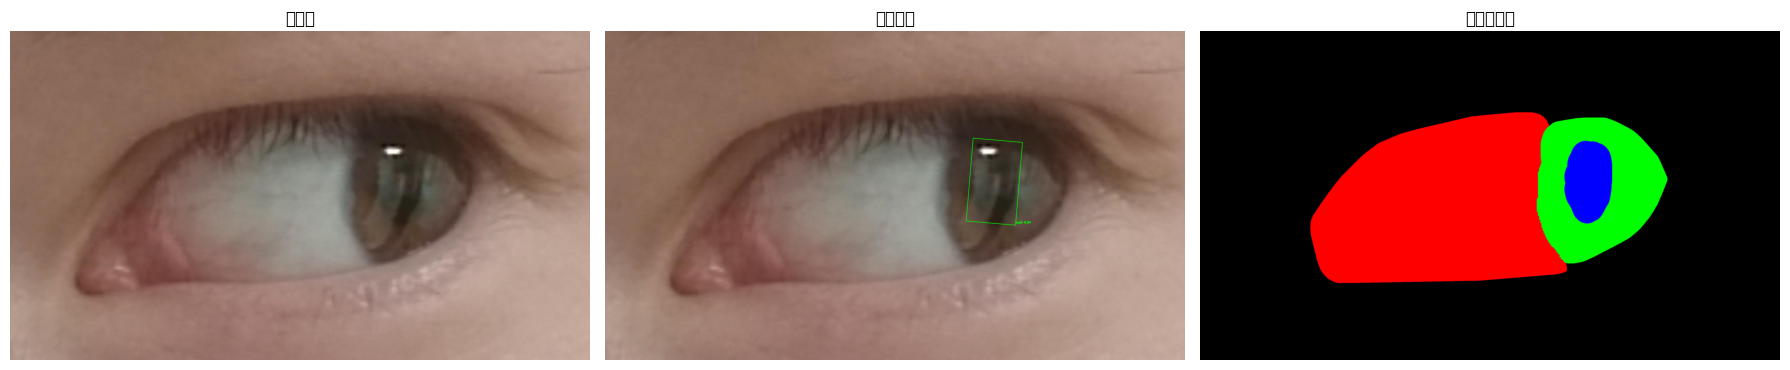

In [5]:
### Mobius (正解のマスクあり)

from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

# モデルのロード
model = YOLO(r"C:\Users\CorneAI\YOLOv11_OBB\models\yolo11n_obb_pupil_Mobius.pt")  # あなたのカスタムモデルのパスを指定

# 画像パス
image_path = r"C:\Users\CorneAI\YOLOv11_OBB\MOBIUS\Images\5\5_1i_Ll_2.jpg"

# 画像パスからマスクパスを自動生成
image_path_obj = Path(image_path)
mask_path = str(image_path_obj).replace("Images", "Masks").replace(".jpg", ".png")
print(f"画像パス: {image_path}")
print(f"マスクパス: {mask_path}")

# 推論実行
results = model(image_path)

# 結果を可視化するための準備
original_img = cv2.imread(image_path)
original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
mask_img = cv2.imread(mask_path)
mask_img = cv2.cvtColor(mask_img, cv2.COLOR_BGR2RGB)

# 検出結果を描画
result_img = original_img.copy()
for result in results:
    # OBBの取得
    xyxyxyxy = result.obb.xyxyxyxy  # ポリゴン形式（4点）
    
    # クラス名と信頼度の取得
    class_names = [result.names[cls.item()] for cls in result.obb.cls.int()]
    confs = result.obb.conf
    
    # 検出したOBBを画像に描画
    for i, box in enumerate(xyxyxyxy):
        pts = box.cpu().numpy().astype(np.int32)
        # ポリゴンを描画
        cv2.polylines(result_img, [pts], True, (0, 255, 0), 2)
        
        # クラス名と信頼度を表示
        label = f"{class_names[i]} {confs[i]:.2f}"
        cv2.putText(result_img, label, (pts[0][0], pts[0][1] - 10),
                   cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# 画像を並べて表示
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.title('元画像')
plt.imshow(original_img)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('検出結果')
plt.imshow(result_img)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('正解マスク')
plt.imshow(mask_img)
plt.axis('off')

plt.tight_layout()
plt.show()
